<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_59/blob/main/Sem_09_CD_Reto_entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Actividad Reto 1:
## Clasificación-ensambles y presentación ejecutiva

### Materia: Ciencia y analítica de datos
**Profesora: María de la Paz Rico Fdz.**

###Alumnos: 
**Andrea Margarita Osorio González** **A01104776**

**Fernando Alfredo Rojas Estrella** **A01685424**


---


**Clasificación**

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
1. Realiza un análisis general de las features importances a traves de decision trees o random forest.
2. Selecciona las variables de mayor importancia.
3. Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
4. Explora que clasificador es el más optimo, ejemplo:
  - Decision trees
  - Random Forest.
5. Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site.
6. Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
7. Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.



---





---
---
# Inicializando libreta y obteniendo URLs de datos

---

In [1]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Módulos, librerías y paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import copy as cp
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
from google.colab import drive
from google.colab.data_table import DataTable
from pandas.core.groupby import groupby

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 16.7 MB 40.1 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Obtención de URLs de información

# 2. Aguas subterraneas.

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def abrir_archivo_(URL, modo):
  with open(URL, modo, encoding = "ISO-8859-1") as fichero:
      linea = fichero.readline()
      print('\n-----------------------------Abriendo archivo-----------------------------\n')
      while linea != '':
          print(linea, end='')
          linea = fichero.readline()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 2. Aguas subterraneas

URL_2_datos_original= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/-Sb_Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
URL_2_datos_tratados= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos tratados/Aguas_subterraneas_datos_tratados.csv'

URL_kmz_2= '/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz'

df_2= pd.read_csv(URL_2_datos_original, encoding= "ISO-8859-1")
df_2_= pd.read_csv(URL_2_datos_tratados, encoding= 'utf-8', sep= ',')


---
---

# Funciones creadas por el equipo para uso posterior

---

In [5]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Funciones para entendimiento de los datos

# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Limpia los datos eliminando los registros nulos o rellena con la media de la columna
def Busca_Nulos_(data_frame, accion): # Función que ayuda a identificar columnas con valores nulos
  data_frame= data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n------------------Búscando y borrando nulos en data frame-----------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'antes del borrado')
        if accion == 'delete':
          data_frame.dropna(subset=[name], inplace=True)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de borrarlos')
        elif accion == 'mean':
          mean= data_frame[name].mean()
          print('\nVal:',mean)
          for i in range(len(data_frame)):
            if data_frame.iloc[i].empty: data_frame.iloc[i][name]=val
            #print(val)
          print('Se encuentran\t', data_frame[name].isnull().sum(),'\tnulos en la columna: ',name, 'después de imputarlos con la media')
        else:
          None
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\nSe procedió al borrado de nulos en el data set\n¿Se encuentran nulos en el data set?: ',data_frame.isnull().values.any())
  print('\n-----------------------------Fin de la función----------------------------\n')

  return data_frame
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Busca_Nulos (data_frame): # Función que ayuda a identificar columnas con valores nulos
  data_frame = data_frame.replace(['SIN DATOS','N/A', 0, ''],np . nan)
  if data_frame.isnull().values.any():          # Buscando nulos
    print('\n-----------------------Búscando nulos en data frame-----------------------\n')
    print('El data frame SÍ tiene nulos')     # Desechamos los valores NaN
    names_columns= data_frame.columns.values
    for name in names_columns:
      if data_frame[name].isnull().values.any():
        print('Se encuentran\t',data_frame[name].isnull().sum(),'\tnulos en la columna: ',name)
      else:
        None
  else:
    print('\n------------------------El data frame NO tiene nulos----------------------\n')
  print('\n-----------------------------Fin de la función----------------------------\n')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_hist(datos_, bins_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.hist(datos_[name], bins= bins_, color= color_, density= True)
    #plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_boxplot(datos_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.boxplot(datos_[name])
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_violin(datos_, color_, titulo_): # Función que sirve para gráficar columnas del data frame
  if color_== '':
    color_= "green"
  nombres= datos_.columns
  n= len(nombres)
  print('-------------------------------------\n# de gráficos:',n)
  nr= int(n/5)+1
  round(nr,0)
  nc = int(n/nr)
  if nc== 0:
    nc= n
  else:
    if nr*nc<n:
      nc=nc+1
  print('Renglones:',nr,', columnas:',nc)  
  sns.set(rc={'figure.figsize':(nc*5,nr*5)})
  fig, axes = plt.subplots(nr,nc)
  plt.suptitle(titulo_ , y= 0.99, fontsize= 17, fontweight= "bold", 
               fontfamily= "serif", fontname= "Sans")
  k= 1
  for name in nombres:
    plt.subplot(nr,nc,k)  # Los nichos para cada histograma se numeran iniciando en 1.
    plt.violinplot(datos_[name])
    plt.ylabel('Conteos')
    plt.title(name)
    plt.subplots_adjust(top=0.95)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_histA(datos_, bins_): # Función que sirve para gráficar columnas del data frame 
  nombres= datos_.columns
  k= 1
  for name in nombres:
    sns.displot(datos_[name], color='green', bins= bins_, kde=True) #creamos el gráfico en Seaborn
    plt.xlabel(name)
    plt.ylabel('Conteos')
    plt.title(name)
    k= k+1
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_exploratorio(datos_): # Función que gráfica de forma exploratoria el data frame
  sns.pairplot(data = datos_, palette= 'bright')
  plt.show()
  print('-------------------------------------')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
def Visualiza_mapa_de_calor(datos_, cmap_, titulo_):
  if cmap_== '':
    cmap_= "crest"
  plt.title(titulo_)
  sns.heatmap(datos_.corr(), annot= True, cmap= cmap_)
  plt.show()
 
 

---
---
# Cargar la bd elegida y con los datos tratados
### Seleccionamos el data set de "Aguas_subterraneas_datos_tratados.csv"

- Seleccionar las variables independientes X y dependiente Y (semáforo)
- Cambiar con la función label encoding el semáforo, ej. ["clase 1", "clase 2", "clase 3"] a [1,2,3]
---


In [9]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Carga de los data frame: "2. Aguas subterraneas - Datos tratados"

#pd.set_option('display.width',25)
#pd.set_option('max_columns',55)
print('\n---------------------Abriendo el Data Frame original----------------------\n')
display('Información ORIGINAL:', df_2.head(2))

print('\n----------------Abriendo el Data Frame con datos tratados-----------------\n')
display('Información CON TRATAMIENTO:', df_2_.head(2))


print('\n--------------Describiendo el Data Frame con datos tratados---------------\n')
display(df_2_.describe())

print('\n--------------Información del Data Frame  con datos tratados---------------\n')
display(df_2_.info())


---------------------Abriendo el Data Frame original----------------------



'Información ORIGINAL:'

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI



----------------Abriendo el Data Frame con datos tratados-----------------



'Información CON TRATAMIENTO:'

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Conteo
0,0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,...,1,1,1,1,1,1,1,1,1,1
1,1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,...,1,1,1,1,1,1,1,1,1,1



--------------Describiendo el Data Frame con datos tratados---------------



,Unnamed: 0,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Conteo
count,1054.000000,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.0
mean,533.829222,-101.848270,23.161796,2020.0,234.695266,2.889943,1142.726471,2.674573,896.945797,1.829222,...,0.942125,0.924099,0.881404,0.998102,0.985769,0.999051,0.988615,0.919355,0.872865,1.0
std,308.829336,6.697568,3.875005,0.0,111.147849,0.683014,1248.990617,0.854783,2765.757924,0.938397,...,0.233617,0.264966,0.323466,0.043540,0.118500,0.030802,0.106143,0.272419,0.333282,0.0
min,0.000000,-116.664250,14.561150,2020.0,26.640000,1.000000,110.000000,1.000000,101.200000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,266.250000,-105.385170,20.224857,2020.0,164.257500,3.000000,506.000000,2.000000,338.050000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,533.500000,-102.170665,22.640705,2020.0,215.825000,3.000000,820.000000,3.000000,551.400000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,800.750000,-98.971268,25.508770,2020.0,292.930000,3.000000,1328.000000,3.000000,915.600000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,1067.000000,-86.864120,32.677713,2020.0,1650.000000,5.000000,18577.000000,5.000000,82170.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0



--------------Información del Data Frame  con datos tratados---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1054 non-null   int64  
 1   CLAVE                 1054 non-null   object 
 2   SITIO                 1054 non-null   object 
 3   ORGANISMO_DE_CUENCA   1054 non-null   object 
 4   ESTADO                1054 non-null   object 
 5   MUNICIPIO             1054 non-null   object 
 6   ACUIFERO              1054 non-null   object 
 7   SUBTIPO               1054 non-null   object 
 8   LONGITUD              1054 non-null   float64
 9   LATITUD               1054 non-null   float64
 10  PERIODO               1054 non-null   int64  
 11  ALC_mg/L              1054 non-null   float64
 12  CALIDAD_ALC           1054 non-null   int64  
 13  CONDUCT_mS/cm         1054 non-null   float64

None

In [16]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Seleccionar las variables independientes X y dependiente Y (semáforo)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Identificando y ordenando la información
# Se enlistan todos los nombres de las variables del data set
nombres_AguSub= ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']
# Se enlistan los nombres de las variables "binarias" del data set
cat_bin_AguSub= ['CUMPLE_CON_ALC', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CF', 'CUMPLE_CON_COND', 'CUMPLE_CON_CR', 'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_HG', 'CUMPLE_CON_MN', 'CUMPLE_CON_NO3', 'CUMPLE_CON_PB', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']
# Se enlistan los nombres de las variables "númericas" del data set
num_AguSub= ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L'] #, 'SDT_mg/L'
# Se enlistan los nombres de las variables "categóricas ordinales" del data set
cat_ord_AguSub= ['CALIDAD_ALC', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_COLI_FEC', 'CALIDAD_CONDUC', 'CALIDAD_CR', 'CALIDAD_DUR', 'CALIDAD_FE', 'CALIDAD_FLUO', 'CALIDAD_HG', 'CALIDAD_MN', 'CALIDAD_N_NO3', 'CALIDAD_PB', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin']
# Se enlistan los nombres de las variables "categóricas nominales" del data set
cat_nom_AguSub= ['ACUIFERO', 'CLAVE', 'CONTAMINANTES', 'ESTADO', 'LATITUD', 'LONGITUD', 'MUNICIPIO', 'ORGANISMO_DE_CUENCA', 'PERIODO', 'SEMAFORO', 'SITIO', 'SUBTIPO']
# Se enlistan los nombres de las variables "georeferencia" del data set
geo_AguSub= ['LATITUD', 'LONGITUD']

print('\n---------------------- Seleccionando variables X, Y ----------------------\n')
# Variables seleccionadas para uso como variables independientes X
nom_var_X= num_AguSub + geo_AguSub
df_2_X= df_2_[nom_var_X].copy()
print('Shape df_2_X', df_2_X.shape)
X= np.array(df_2_X)
y= np.array(df_2_['SEMAFORO'])
print('Shape X:', X.shape, '\n\t Variables:')
for name in nom_var_X:
  print('\t -', name)
print('\n')
print('Shape y:', y.shape, '\n\t Variables:')
print('\t -', 'SEMAFORO')
print('\n--------------------------------------------------------------------------\n')



---------------------- Seleccionando variables X, Y ----------------------

Shape df_2_X (1054, 16)
Shape X: (1054, 16) 
	 Variables:
	 - ALC_mg/L
	 - AS_TOT_mg/L
	 - CD_TOT_mg/L
	 - COLI_FEC_NMP/100_mL
	 - CONDUCT_mS/cm
	 - CR_TOT_mg/L
	 - DUR_mg/L
	 - FE_TOT_mg/L
	 - FLUORUROS_mg/L
	 - HG_TOT_mg/L
	 - MN_TOT_mg/L
	 - N_NO3_mg/L
	 - PB_TOT_mg/L
	 - SDT_M_mg/L
	 - LATITUD
	 - LONGITUD


Shape y: (1054,) 
	 Variables:
	 - SEMAFORO

--------------------------------------------------------------------------



In [48]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Cambiar con la función label encoding el semáforo, ej. ["clase 1", "clase 2", "clase 3"] a [1,2,3]
from sklearn import preprocessing

print('\n------------------------ Aplicando label encoding ------------------------\n')
y_categorias= df_2_['SEMAFORO'].unique()
label_encoder= preprocessing.LabelEncoder()
y_df= pd.DataFrame(df_2_['SEMAFORO'], columns= ['SEMAFORO'])
y_df= y_df.assign(Clase=df_2_['SEMAFORO'])
y_df['Clase']= label_encoder.fit_transform(y_df['Clase'])
y_df= pd.DataFrame(y_df)

print('Categorías y:', y_categorias, '\n\ny:')
print(y_df, '\n')
print('Shape y_df:', y_df.shape, '\n\t Variables:')
print('\t -', y_df.columns)

print('\n--------------------------------------------------------------------------\n')
y_df['Clase']= y_df['Clase'].replace(1, 3)
y_df['Clase']= y_df['Clase'].replace(2, 1)
y_df['Clase']= y_df['Clase'].replace(0, 2)

print(y_df.sample(10))

print('\n--------------------------------------------------------------------------\n')

y= y_df.Clase.copy()
print(y.sample(10))


------------------------ Aplicando label encoding ------------------------

Categorías y: ['Verde' 'Rojo' 'Amarillo'] 

y:
     SEMAFORO  Clase
0       Verde      2
1       Verde      2
2        Rojo      1
3       Verde      2
4        Rojo      1
...       ...    ...
1049     Rojo      1
1050     Rojo      1
1051     Rojo      1
1052    Verde      2
1053    Verde      2

[1054 rows x 2 columns] 

Shape y_df: (1054, 2) 
	 Variables:
	 - Index(['SEMAFORO', 'Clase'], dtype='object')

--------------------------------------------------------------------------

     SEMAFORO  Clase
44   Amarillo      2
576     Verde      1
25      Verde      1
201     Verde      1
928     Verde      1
300     Verde      1
563      Rojo      3
145      Rojo      3
53   Amarillo      2
882  Amarillo      2

--------------------------------------------------------------------------

565     2
1004    2
2       3
1045    1
404     3
896     1
930     1
391     2
866     1
400     1
Name: Clase, dtype: int64


---

# 1. Realiza un análisis general de las features importances a traves de decision trees o random forest.

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


---

# 2. Selecciona las variables de mayor importancia.

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 

print('\n--------------------------------- título ---------------------------------\n')
print('\n--------------------------------------------------------------------------\n')


---

# 3. Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

---

---

# 4. Explora que clasificador es el más optimo, ejemplo:
- Decision trees
- Random Forest.

---

---

# 5. Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

---

---

# 6. Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

---

---

# 7. Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

---

---
---
# Análisis visual exploratorio de los datos

**Se utiliza la función pariplot para entender inicialmente los datos y comprender si se pueden gráficar directamente como se obtienen**

---


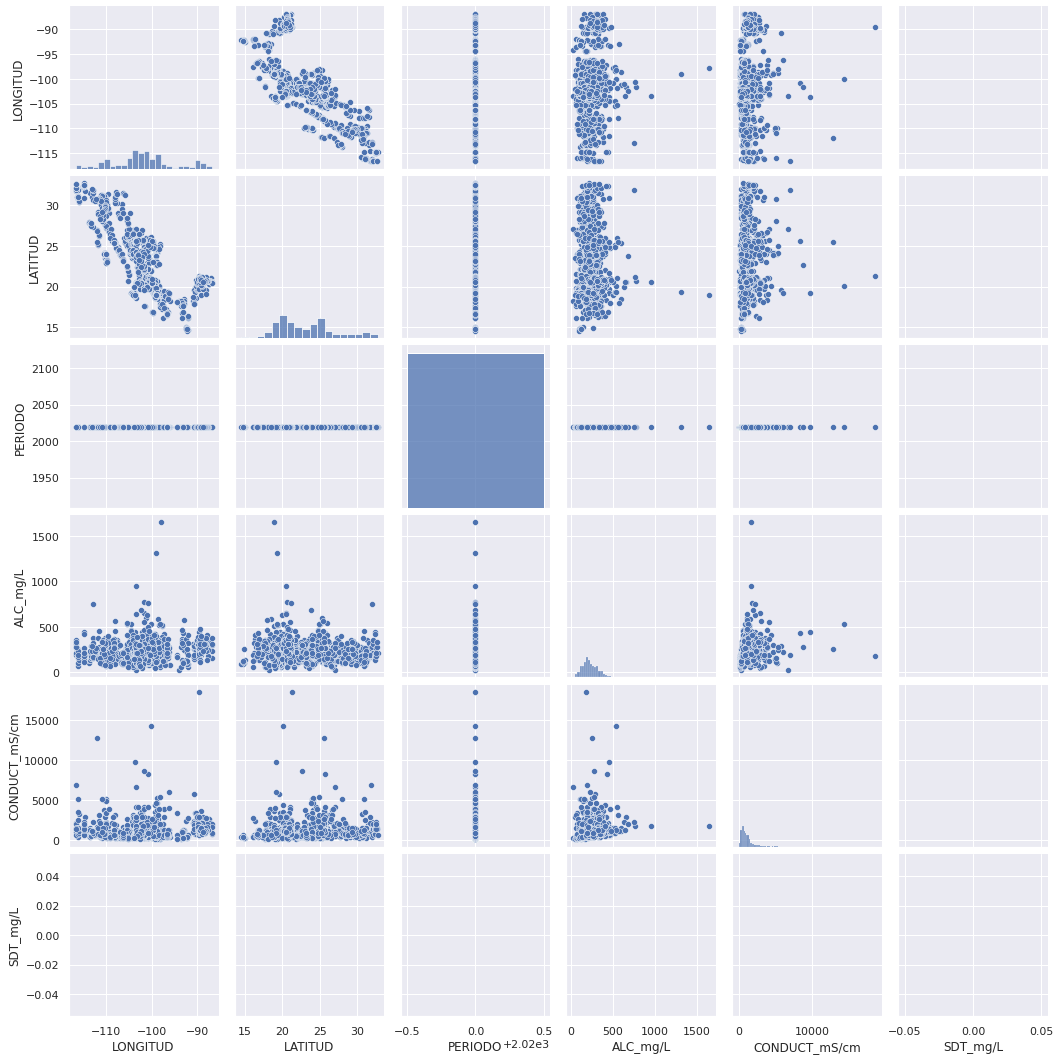

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización exploratoria "2. Aguas subterraneas"

Visualiza_exploratorio(df_2)

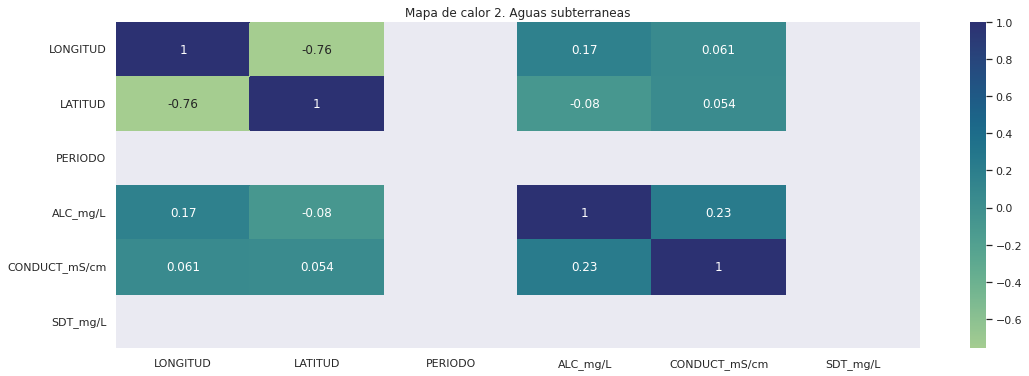

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Mapa de calor 2. Aguas subterraneas

sns.set(rc={'figure.figsize':(18,6)})
Visualiza_mapa_de_calor(df_2, "", "Mapa de calor 2. Aguas subterraneas")

### De acuerdo a los resultados obtenidos se procederá a realizar un tratamiento en algunas variables para poderlas observar graficamente

---
---
# Tratamiento de datos "2. Aguas subterraneas"
---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Identificando y ordenando la información

# Se enlistan todos los nombres de las variables del data set
nombres_AguSub= ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO', 'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L', 'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L', 'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL', 'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L', 'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR', 'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L', 'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR', 'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN', 'CUMPLE_CON_FE']

# Se enlistan los nombres de las variables "binarias" del data set
cat_bin_AguSub= ['CUMPLE_CON_ALC', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD', 'CUMPLE_CON_CF', 'CUMPLE_CON_COND', 'CUMPLE_CON_CR', 'CUMPLE_CON_DUR', 'CUMPLE_CON_FE', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_HG', 'CUMPLE_CON_MN', 'CUMPLE_CON_NO3', 'CUMPLE_CON_PB', 'CUMPLE_CON_SDT_ra', 'CUMPLE_CON_SDT_salin']

# Se enlistan los nombres de las variables "númericas" del data set
num_AguSub= ['ALC_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'COLI_FEC_NMP/100_mL', 'CONDUCT_mS/cm', 'CR_TOT_mg/L', 'DUR_mg/L', 'FE_TOT_mg/L', 'FLUORUROS_mg/L', 'HG_TOT_mg/L', 'MN_TOT_mg/L', 'N_NO3_mg/L', 'PB_TOT_mg/L', 'SDT_M_mg/L'] #, 'SDT_mg/L'

# Se enlistan los nombres de las variables "categóricas ordinales" del data set
cat_ord_AguSub= ['CALIDAD_ALC', 'CALIDAD_AS', 'CALIDAD_CD', 'CALIDAD_COLI_FEC', 'CALIDAD_CONDUC', 'CALIDAD_CR', 'CALIDAD_DUR', 'CALIDAD_FE', 'CALIDAD_FLUO', 'CALIDAD_HG', 'CALIDAD_MN', 'CALIDAD_N_NO3', 'CALIDAD_PB', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin']

# Se enlistan los nombres de las variables "categóricas nominales" del data set
cat_nom_AguSub= ['ACUIFERO', 'CLAVE', 'CONTAMINANTES', 'ESTADO', 'LATITUD', 'LONGITUD', 'MUNICIPIO', 'ORGANISMO_DE_CUENCA', 'PERIODO', 'SEMAFORO', 'SITIO', 'SUBTIPO']

# Se enlistan los nombres de las variables "georeferencia" del data set
geo_AguSub= ['LATITUD', 'LONGITUD']

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Se buscan datos nulos

df_2_= df_2.copy() # Hacemos una copia del data frame original
df_2_['Conteo']= 1 # Agregando columna con valor 1 para contar renglones
Busca_Nulos(df_2_) # Llámamos a función que busca nulos en el DF

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('-----------------Agrupando varible por opciones contenidas----------------\n')
print('Variable: SDT_mg/L')
print(df_2_.groupby(['SDT_mg/L']).count())
print('arr:' ,df_2_['SDT_mg/L'].to_numpy())
# No se encuentra información, por lo tanto se elimina la columna SDT_mg/L
df_2_= df_2_.drop(axis=1, columns='SDT_mg/L') # Borrando columna

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('\n- - - - - - - - - - - - - - - - - - - -\n')
print('Variable: CONTAMINANTES')
df_group= df_2_[['CONTAMINANTES', 'Conteo']]
print(df_group.groupby(['CONTAMINANTES']).count())
df_2_['CONTAMINANTES']= df_2_['CONTAMINANTES'].replace(['SIN DATOS','N/A', 0, '', np.nan], 'Sin_contaminantes_encontrados')
# Con base en la información proporcionada por el data set, se encuentra que los valores faltantes de la variable "CONTAMINANTES"
# corresponde a la categoría "Sin_contaminantes_encontrados" por lo que se hace un remplazo de nulos por dicha categoría


# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Borrando filas con valores nulos
df_2_= Busca_Nulos_(df_2_, 'delete')


-----------------------Búscando nulos en data frame-----------------------

El data frame SÍ tiene nulos
Se encuentran	 4 	nulos en la columna:  ALC_mg/L
Se encuentran	 4 	nulos en la columna:  CALIDAD_ALC
Se encuentran	 6 	nulos en la columna:  CONDUCT_mS/cm
Se encuentran	 6 	nulos en la columna:  CALIDAD_CONDUC
Se encuentran	 1068 	nulos en la columna:  SDT_mg/L
Se encuentran	 2 	nulos en la columna:  SDT_M_mg/L
Se encuentran	 2 	nulos en la columna:  CALIDAD_SDT_ra
Se encuentran	 2 	nulos en la columna:  CALIDAD_SDT_salin
Se encuentran	 1 	nulos en la columna:  DUR_mg/L
Se encuentran	 1 	nulos en la columna:  CALIDAD_DUR
Se encuentran	 1 	nulos en la columna:  N_NO3_mg/L
Se encuentran	 1 	nulos en la columna:  CALIDAD_N_NO3
Se encuentran	 434 	nulos en la columna:  CONTAMINANTES

-----------------------------Fin de la función----------------------------

-----------------Agrupando varible por opciones contenidas----------------

Variable: SDT_mg/L
Empty DataFrame
Columns: [CLAVE, S

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Se realiza un remplazo de categorías en texto por valores númericos en variables categóricas

print('\n-----Remplazando valores categóricos ordinales por valores númericos------\n')
nom_CALIDAD_COLI_FEC= ['Potable - Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
nom_CALIDAD_SDT_ra= ['Excelente para riego', 'Cultivos sensibles', 'Cultivos con manejo especial', 'Cultivos tolerantes', 'Indeseable para riego']
nom_CALIDAD_CONDUC= ['Excelente para riego', 'Buena para riego', 'Permisible para riego', 'Dudosa para riego', 'Indeseable para riego']
nom_CALIDAD_ALC= ['Baja', 'Media', 'Alta', 'Indeseable', 'Indeseable como FAAP']
nom_CALIDAD_SDT_salin= ['Potable - Dulce', 'Ligeramente salobres', 'Salobres', 'Salinas']
nom_CALIDAD_FLUO= ['Potable - Optima', 'Media', 'Baja', 'Alta']
nom_CALIDAD_DUR= ['Potable - Suave', 'Potable - Moderadamente suave', 'Potable - Dura', 'Muy dura e indeseable usos industrial y domestico']
nom_CALIDAD_CD= ['Potable - Excelente', 'Apta como FAAP', 'No apta como FAAP']
nom_CALIDAD_AS= ['Potable - Excelente', 'Apta como FAAP', 'No apta como FAAP']
nom_CALIDAD_N_NO3= ['Potable - Excelente', 'Potable - Buena calidad', 'No apta como FAAP']
nom_CALIDAD_MN= ['Potable - Excelente', 'Sin efectos en la salud - Puede dar color al agua', 'Puede afectar la salud']
nom_CALIDAD_CR= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_PB= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_HG= ['Potable - Excelente', 'No apta como FAAP']
nom_CALIDAD_FE= ['Potable - Excelente', 'Sin efectos en la salud - Puede dar color al agua']

i= 0
for i in range(5):
  index= i+1
  df_2_['CALIDAD_SDT_ra']= df_2_['CALIDAD_SDT_ra'].replace([nom_CALIDAD_SDT_ra[i]], index)
  df_2_['CALIDAD_COLI_FEC']= df_2_['CALIDAD_COLI_FEC'].replace([nom_CALIDAD_COLI_FEC[i]], index)
  df_2_['CALIDAD_CONDUC']= df_2_['CALIDAD_CONDUC'].replace([nom_CALIDAD_CONDUC[i]], index)
  df_2_['CALIDAD_ALC']= df_2_['CALIDAD_ALC'].replace([nom_CALIDAD_ALC[i]], index)
  if i<4:
    df_2_['CALIDAD_SDT_salin']= df_2_['CALIDAD_SDT_salin'].replace([nom_CALIDAD_SDT_salin[i]], index)
    df_2_['CALIDAD_FLUO']= df_2_['CALIDAD_FLUO'].replace([nom_CALIDAD_FLUO[i]], index)
    df_2_['CALIDAD_DUR']= df_2_['CALIDAD_DUR'].replace([nom_CALIDAD_DUR[i]], index)
  if i<3:
    df_2_['CALIDAD_CD']= df_2_['CALIDAD_CD'].replace([nom_CALIDAD_CD[i]], index)
    df_2_['CALIDAD_AS']= df_2_['CALIDAD_AS'].replace([nom_CALIDAD_AS[i]], index)
    df_2_['CALIDAD_N_NO3']= df_2_['CALIDAD_N_NO3'].replace([nom_CALIDAD_N_NO3[i]], index)
    df_2_['CALIDAD_MN']= df_2_['CALIDAD_MN'].replace([nom_CALIDAD_MN[i]], index)
  if i<2:
    df_2_['CALIDAD_CR']= df_2_['CALIDAD_CR'].replace([nom_CALIDAD_CR[i]], index)
    df_2_['CALIDAD_PB']= df_2_['CALIDAD_PB'].replace([nom_CALIDAD_PB[i]], index)
    df_2_['CALIDAD_HG']= df_2_['CALIDAD_HG'].replace([nom_CALIDAD_HG[i]], index)
    df_2_['CALIDAD_FE']= df_2_['CALIDAD_FE'].replace([nom_CALIDAD_FE[i]], index)

df_cat_ord= pd.DataFrame()
for name in cat_ord_AguSub:
  df_cat_ord[name]= df_2_[name]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Se remplazan valores binarios de texto a númericos
print('\n------------Remplazando valores binarios por datos númericos--------------\n')
for name in cat_bin_AguSub:
  df_2_[name]= df_2_[name].replace('SI', 1)
  df_2_[name]= df_2_[name].replace('NO', 0)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Se remplazan valores de string en datos númericos
print('\n-----------Remplazando valores de string por datos númericos--------------\n')
for name in num_AguSub:
  df_2_[name]= df_2_[name].replace('<25','25')
  df_2_[name]= df_2_[name].replace('<20','20')
  df_2_[name]= df_2_[name].replace('<1.1','1.1')
  df_2_[name]= df_2_[name].replace('<0.2','0.2')
  df_2_[name]= df_2_[name].replace('<0.025','0.025')
  df_2_[name]= df_2_[name].replace('<0.02','0.02')
  df_2_[name]= df_2_[name].replace('<0.01','0.01')
  df_2_[name]= df_2_[name].replace('<0.005','0.005')
  df_2_[name]= df_2_[name].replace('<0.003','0.003')
  df_2_[name]= df_2_[name].replace('<0.0015','0.0015')
  df_2_[name]= df_2_[name].replace('<0.0005','0.0005')
  df_2_[name]= df_2_[name].astype('float')

df_num= pd.DataFrame()
for name in num_AguSub:
  df_num[name]= df_2_[name]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Se identifican tendencias centrales promedio, media y mediana de los datos,
# así como medidas de dispersión, máximo, mínimo.
print('\n--------------------------------------------------------------------------\n')
print('\nSe identifican tendencias centrales promedio, media y mediana de los datos,')
print('así como medidas de dispersión, máximo, mínimo.\n')
display('df_2_:', df_2_.describe())

pd.set_option('display.width',25)
pd.set_option('display.min_rows',10)
pd.set_option('display.max_seq_items', 5)
pd.set_option('max_columns', 15)



-----Remplazando valores categóricos ordinales por valores númericos------


------------Remplazando valores binarios por datos númericos--------------


-----------Remplazando valores de string por datos númericos--------------


--------------------------------------------------------------------------


Se identifican tendencias centrales promedio, media y mediana de los datos,
así como medidas de dispersión, máximo, mínimo.



'df_2_:'

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,...,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Conteo
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,...,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.0
mean,-101.848270,23.161796,2020.0,234.695266,2.889943,1142.726471,2.674573,...,0.998102,0.985769,0.999051,0.988615,0.919355,0.872865,1.0
std,6.697568,3.875005,0.0,111.147849,0.683014,1248.990617,0.854783,...,0.043540,0.118500,0.030802,0.106143,0.272419,0.333282,0.0
min,-116.664250,14.561150,2020.0,26.640000,1.000000,110.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,-105.385170,20.224857,2020.0,164.257500,3.000000,506.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
50%,-102.170665,22.640705,2020.0,215.825000,3.000000,820.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
75%,-98.971268,25.508770,2020.0,292.930000,3.000000,1328.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,-86.864120,32.677713,2020.0,1650.000000,5.000000,18577.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


---

# Análisis visual de la informacióm después del tratamiento de las variables


---

Matriz de correlación:

Entendiendo las correlaciones existentes entre las variables de la medición,
calidad basada en la medición y si cumple con los valores deseables para las
aguas subterraneas



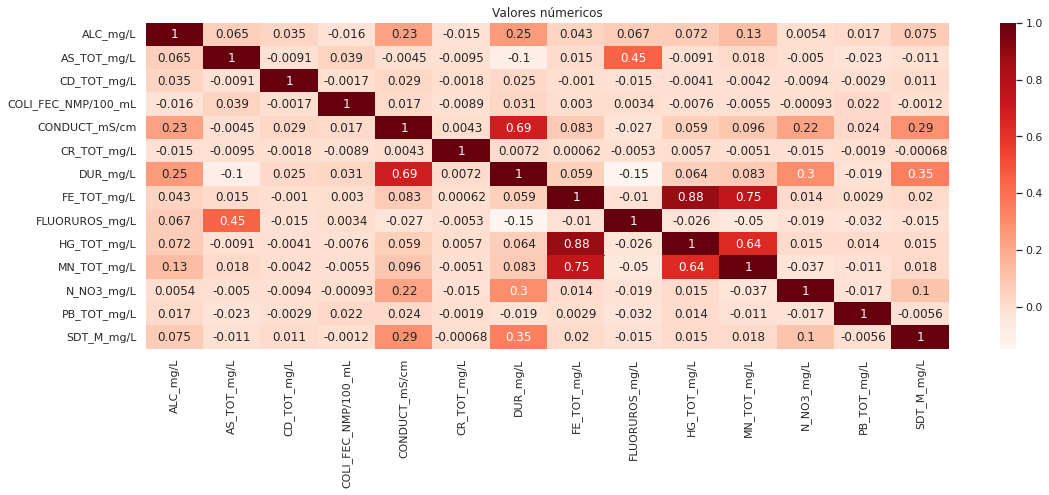

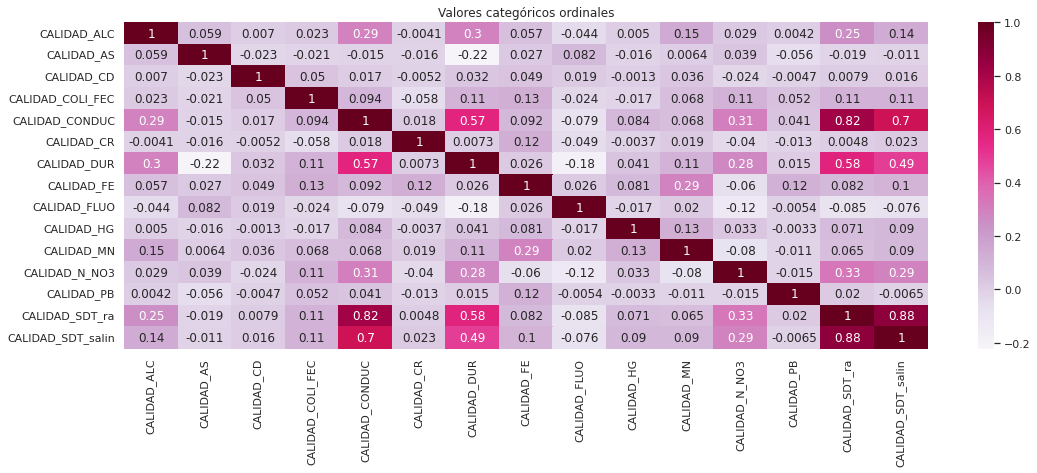

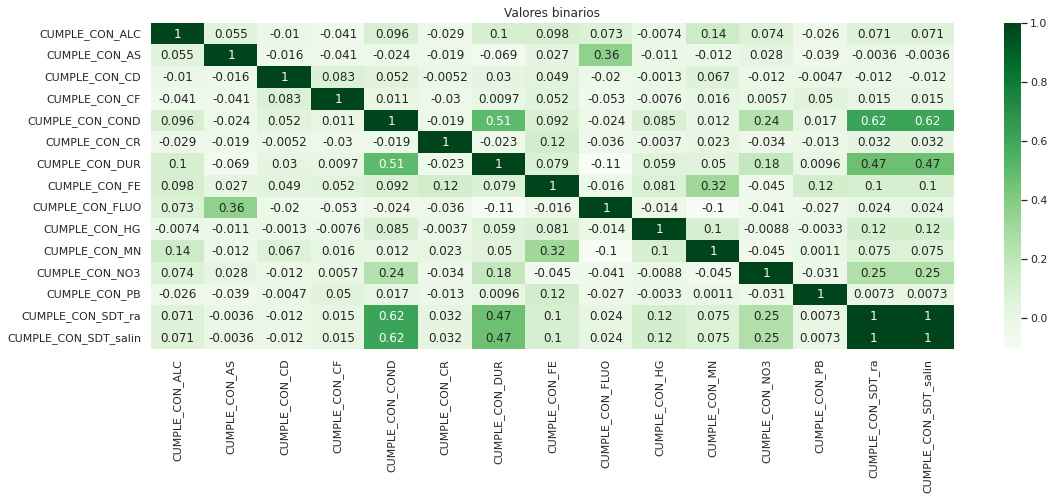

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Mapa de calor de "2. Aguas subterraneas"

print('Matriz de correlación:\n') 
print('Entendiendo las correlaciones existentes entre las variables de la medición,')
print('calidad basada en la medición y si cumple con los valores deseables para las')
print('aguas subterraneas\n') 
sns.set(rc={'figure.figsize':(18,6)})
Visualiza_mapa_de_calor(df_2_[num_AguSub], 'Reds', 'Valores númericos')
Visualiza_mapa_de_calor(df_2_[cat_ord_AguSub], 'PuRd', 'Valores categóricos ordinales')
Visualiza_mapa_de_calor(df_2_[cat_bin_AguSub], 'Greens', 'Valores binarios')

### Conclusiones de las gráficas

- Se consideraron comparar 3 gráficas que contienen información similar: la "medición" de la variable en mg/L, la interpretación de la medida en mg/L representada de forma categórica en las vaariables de "calidad" y una variable binaria qué indica el "cumplimiento" minímo para no ser considerado como concentración contaminante.
- Se puede observar en los 3 mapas de calor que existe una correlación muy similar entre las variables de: medidas, calidad y cumplimiento.

-------------------------------------
# de gráficos: 14
Renglones: 3 , columnas: 5


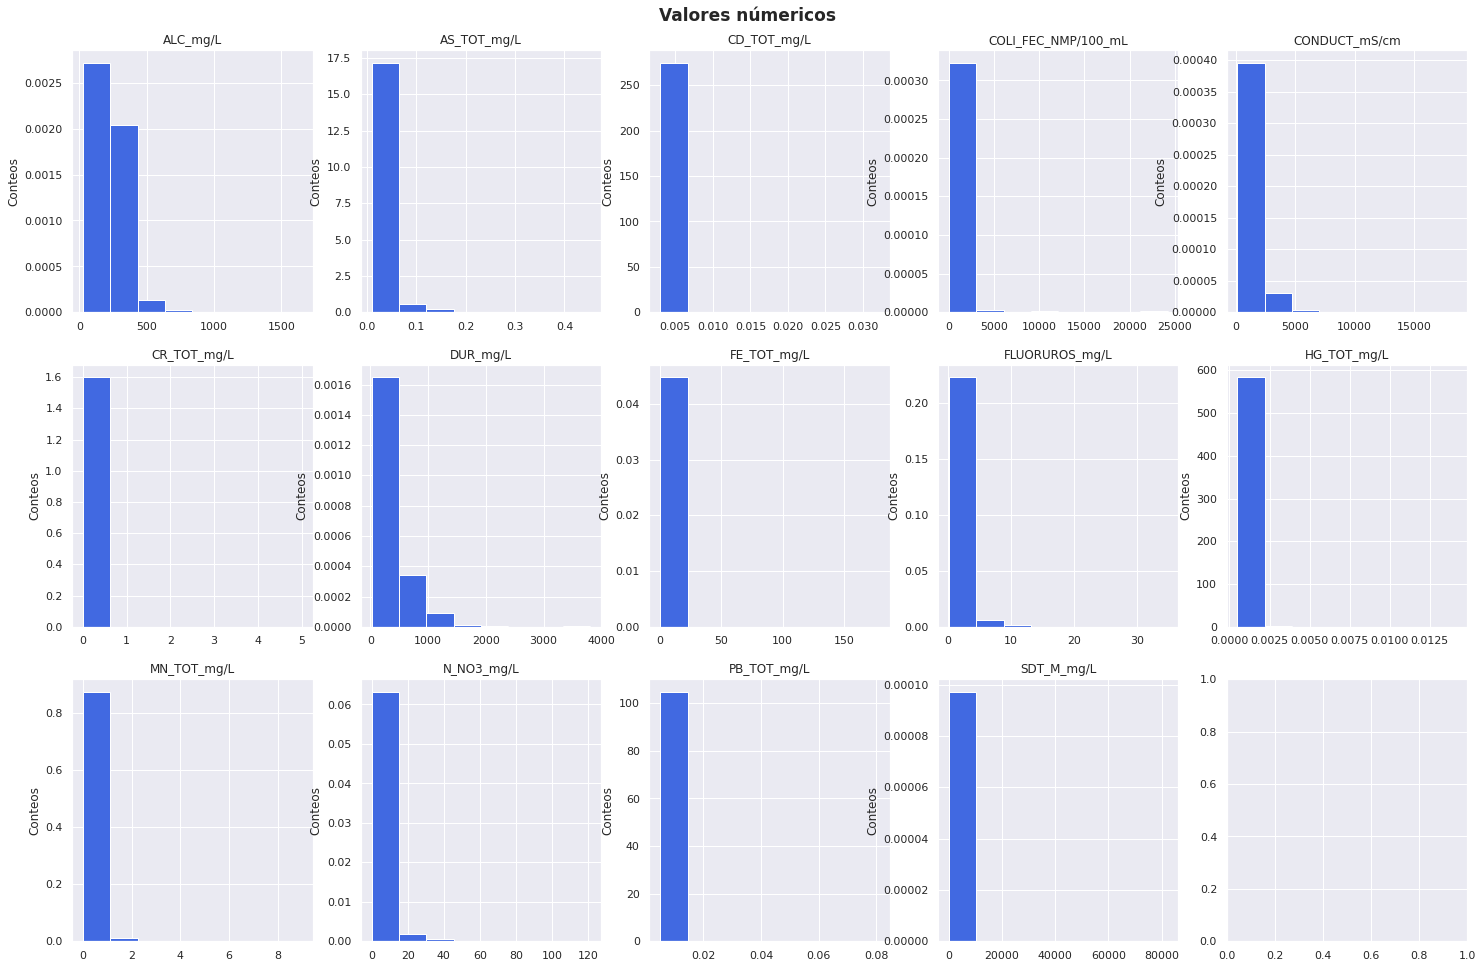

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


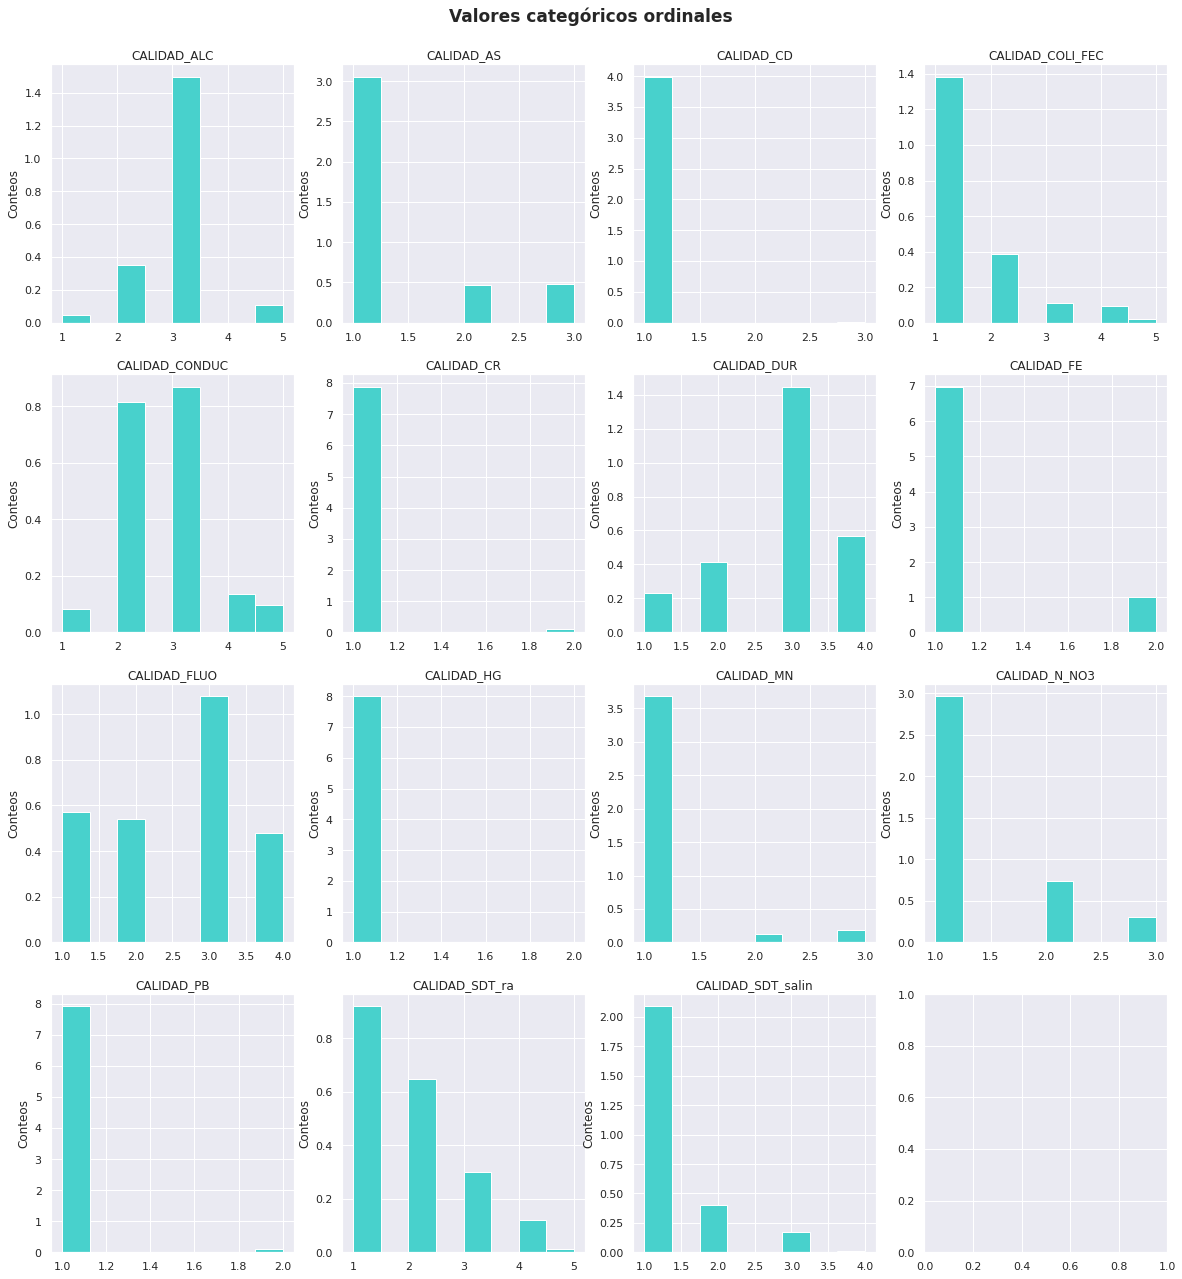

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


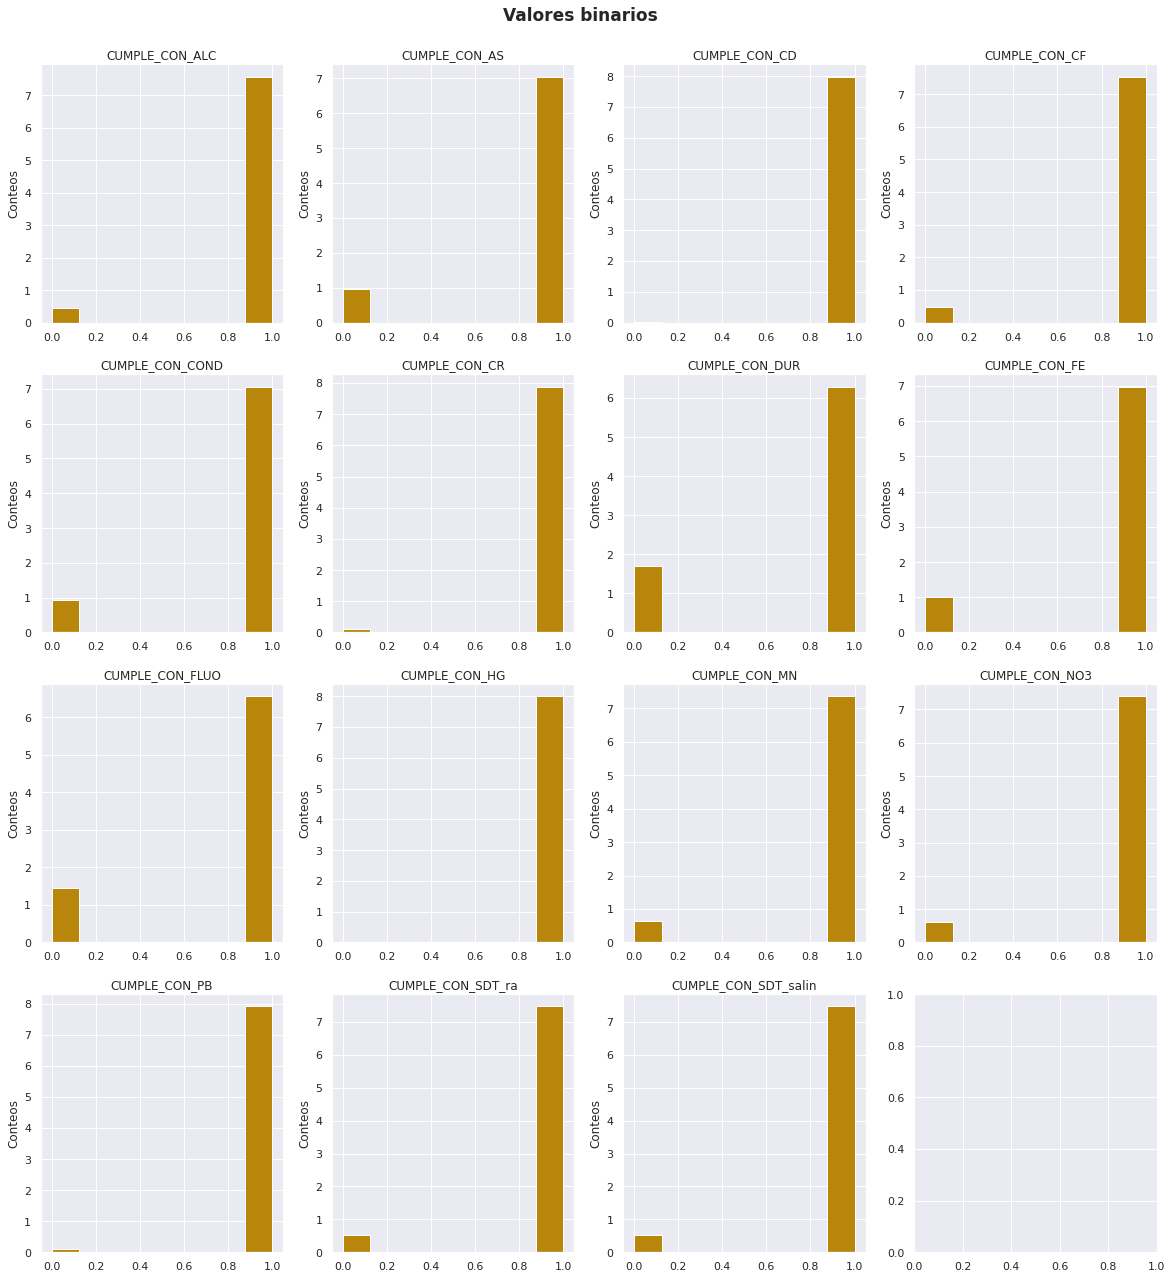

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Histogramas de "2. Aguas subterraneas"

Visualiza_hist(df_2_[num_AguSub], 8, 'royalblue', 'Valores númericos')
Visualiza_hist(df_2_[cat_ord_AguSub], 8, 'mediumturquoise', 'Valores categóricos ordinales')
Visualiza_hist(df_2_[cat_bin_AguSub], 8, 'darkgoldenrod', 'Valores binarios')

### Conclusiones de los histógramas

- La información presentada corresponde a las variables de: medidas, calidad y cumplimiento. Se puede observar que las variables de medidas presentan la información en su propio intervalo y revisando la información del data set podemos observar que los puntos de corte para considerar el nivel de concentración contaminante de cada medida son muy distintos entre medidas.
- Se puede observar que las gráficas de las variables correspondientes a la calidad presentan una distribución más uniforme que la de las mediciones. Se nota que existe un cambio debido a que la información de calildad corresponde a datos categóricos que ya fueron clasificados de forma experta para determinar el nivel de contaminación del agua.
- La información presentada en los histógramas de las variables binarias, muestran una distribución de datos enfocados a determinar si en su conjunto las medidas cumplen o no con el minímo para no ser considerada como concentración contaminante 

 A continuación se agrega una tabla con la descripción de las variables de calidad, así como el valor númerico con el que remplazamos las categórias ordinales.

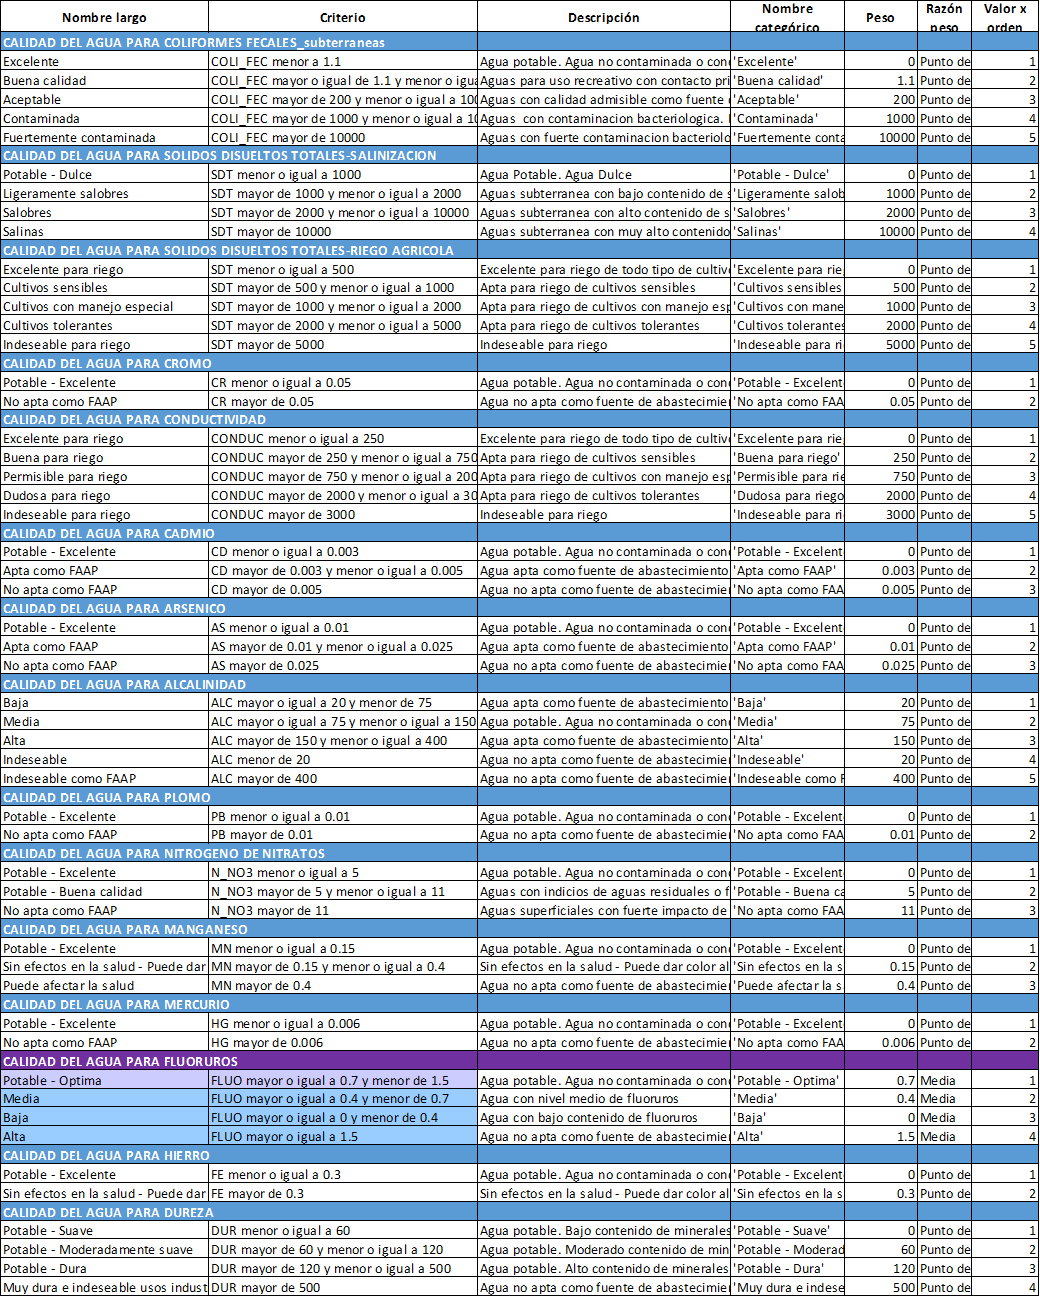

-------------------------------------
# de gráficos: 14
Renglones: 3 , columnas: 5


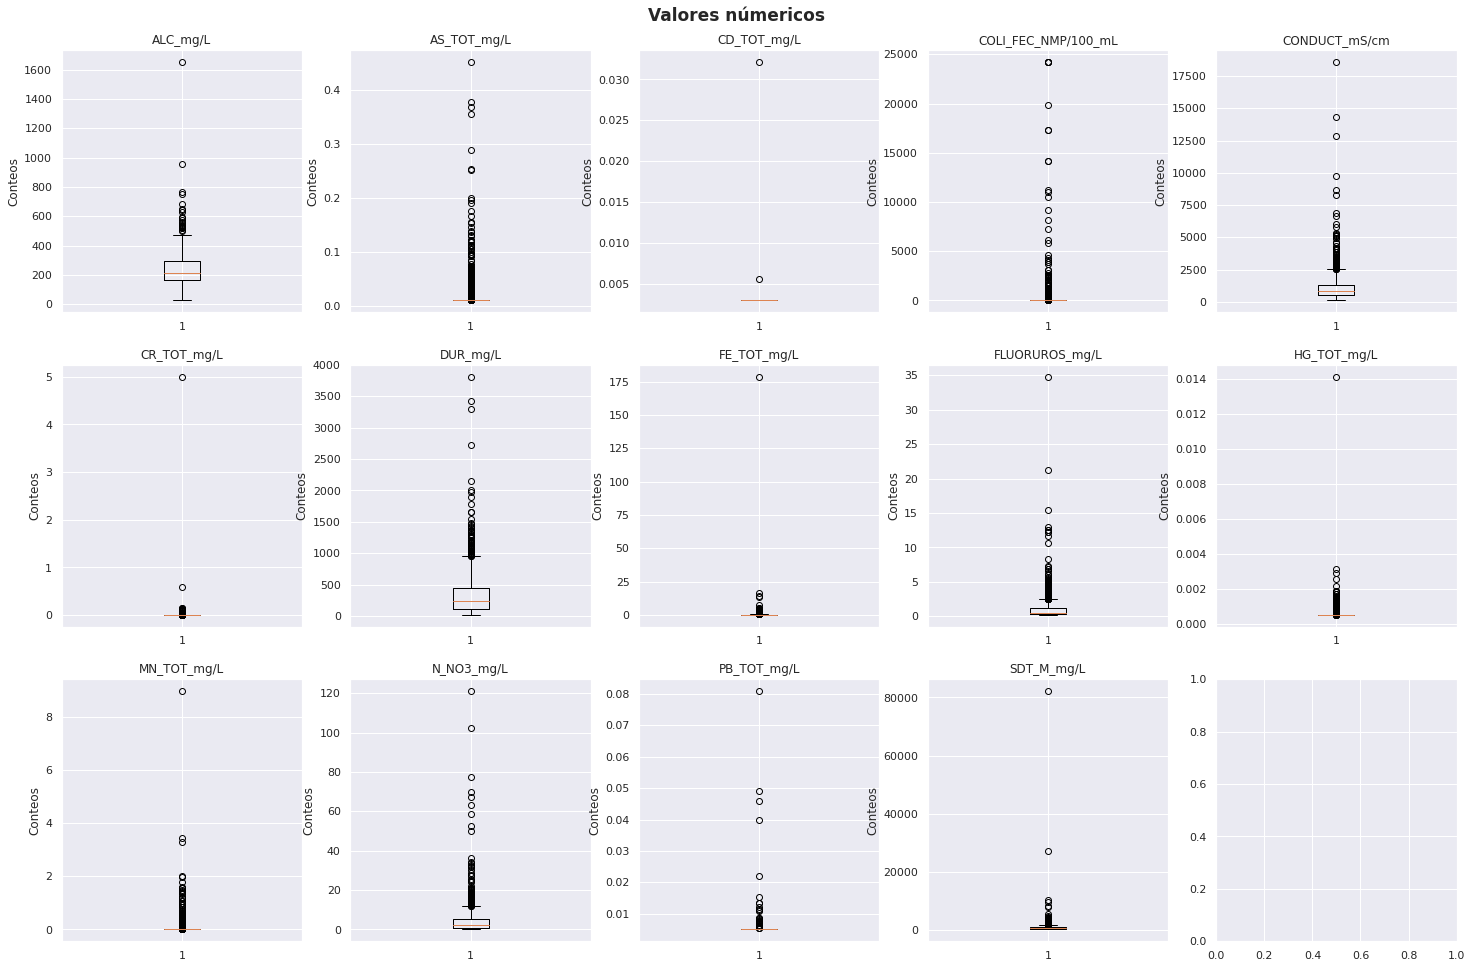

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


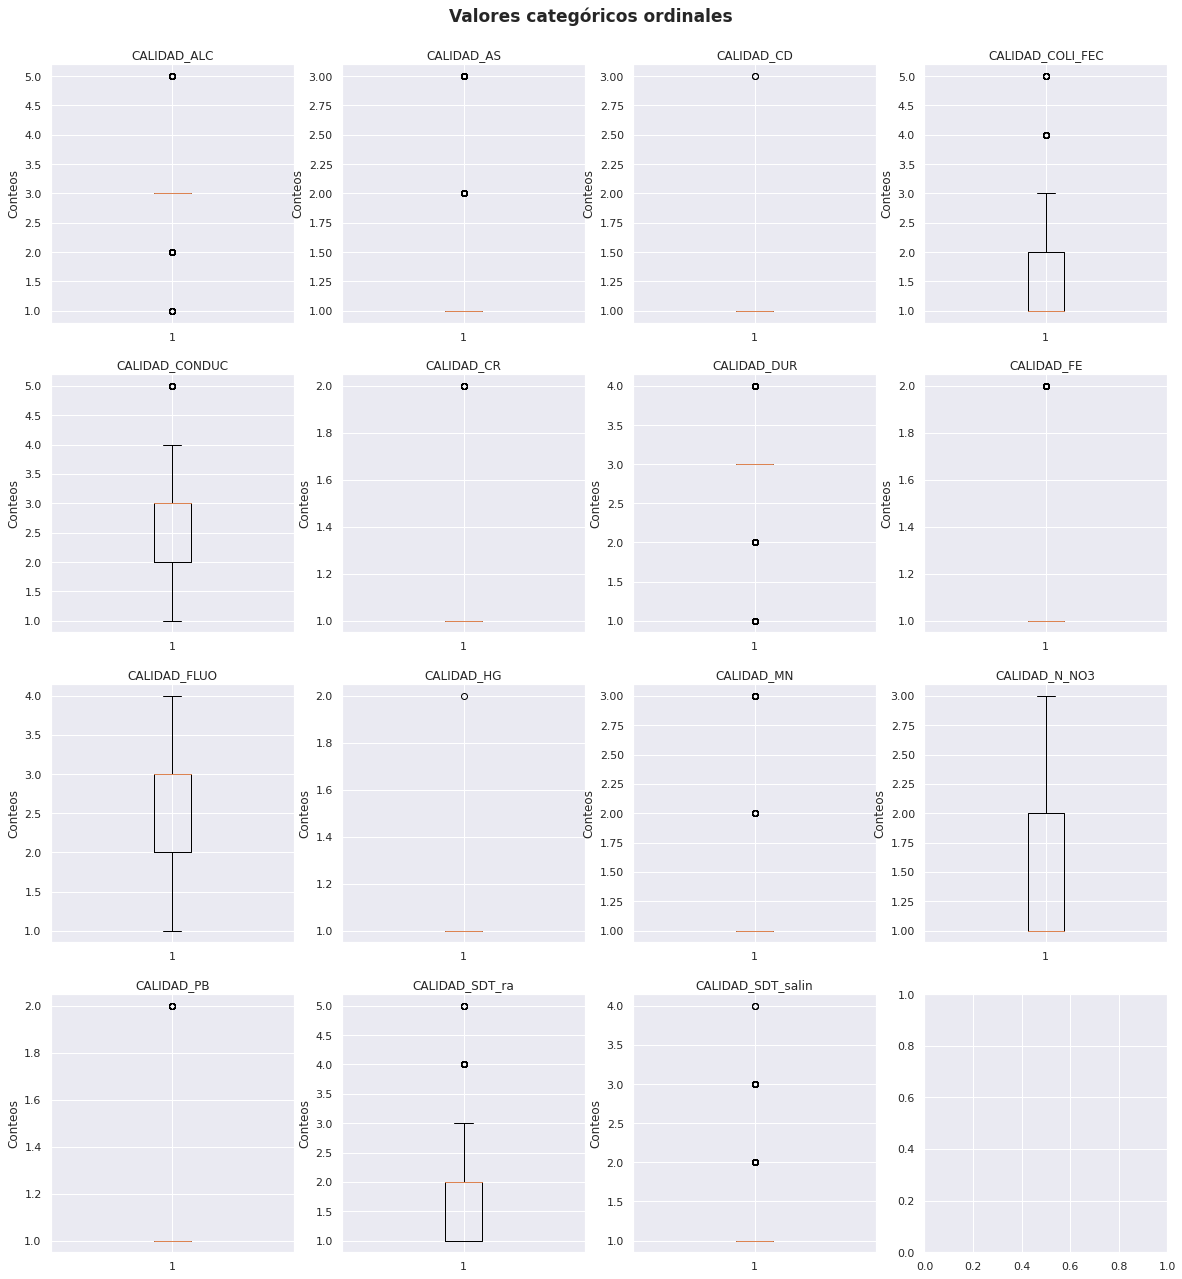

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


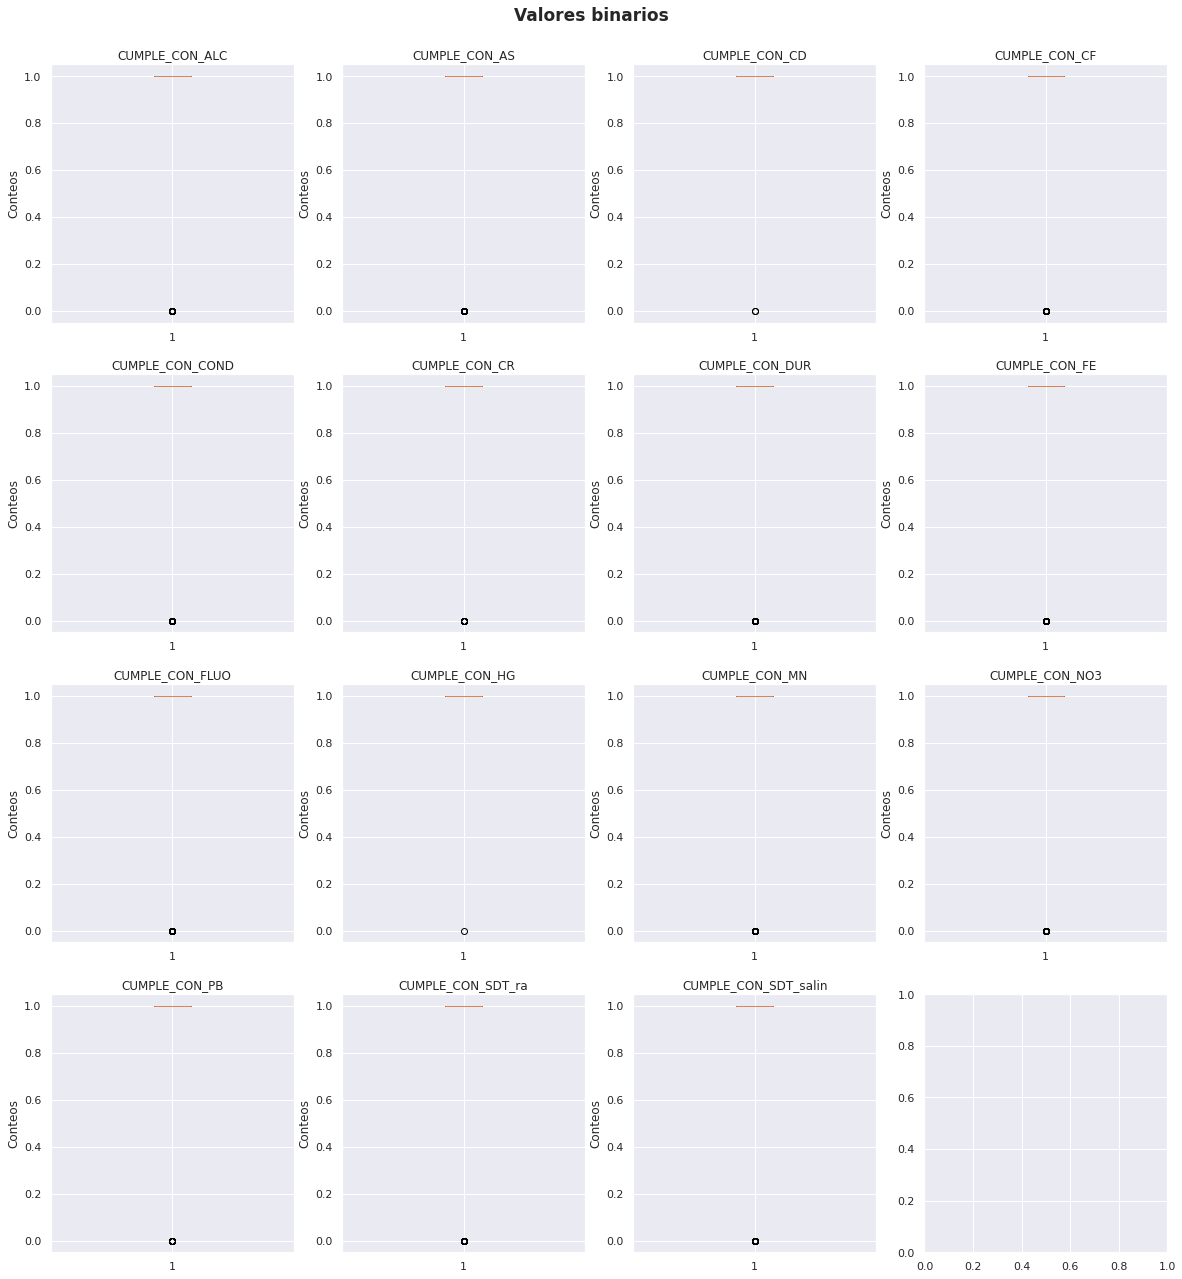

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización de boxplot de "2. Aguas subterraneas"

Visualiza_boxplot(df_2_[num_AguSub], 'royalblue', 'Valores númericos')
Visualiza_boxplot(df_2_[cat_ord_AguSub], 'mediumturquoise', 'Valores categóricos ordinales')
Visualiza_boxplot(df_2_[cat_bin_AguSub], 'darkgoldenrod', 'Valores binarios')

-------------------------------------
# de gráficos: 14
Renglones: 3 , columnas: 5


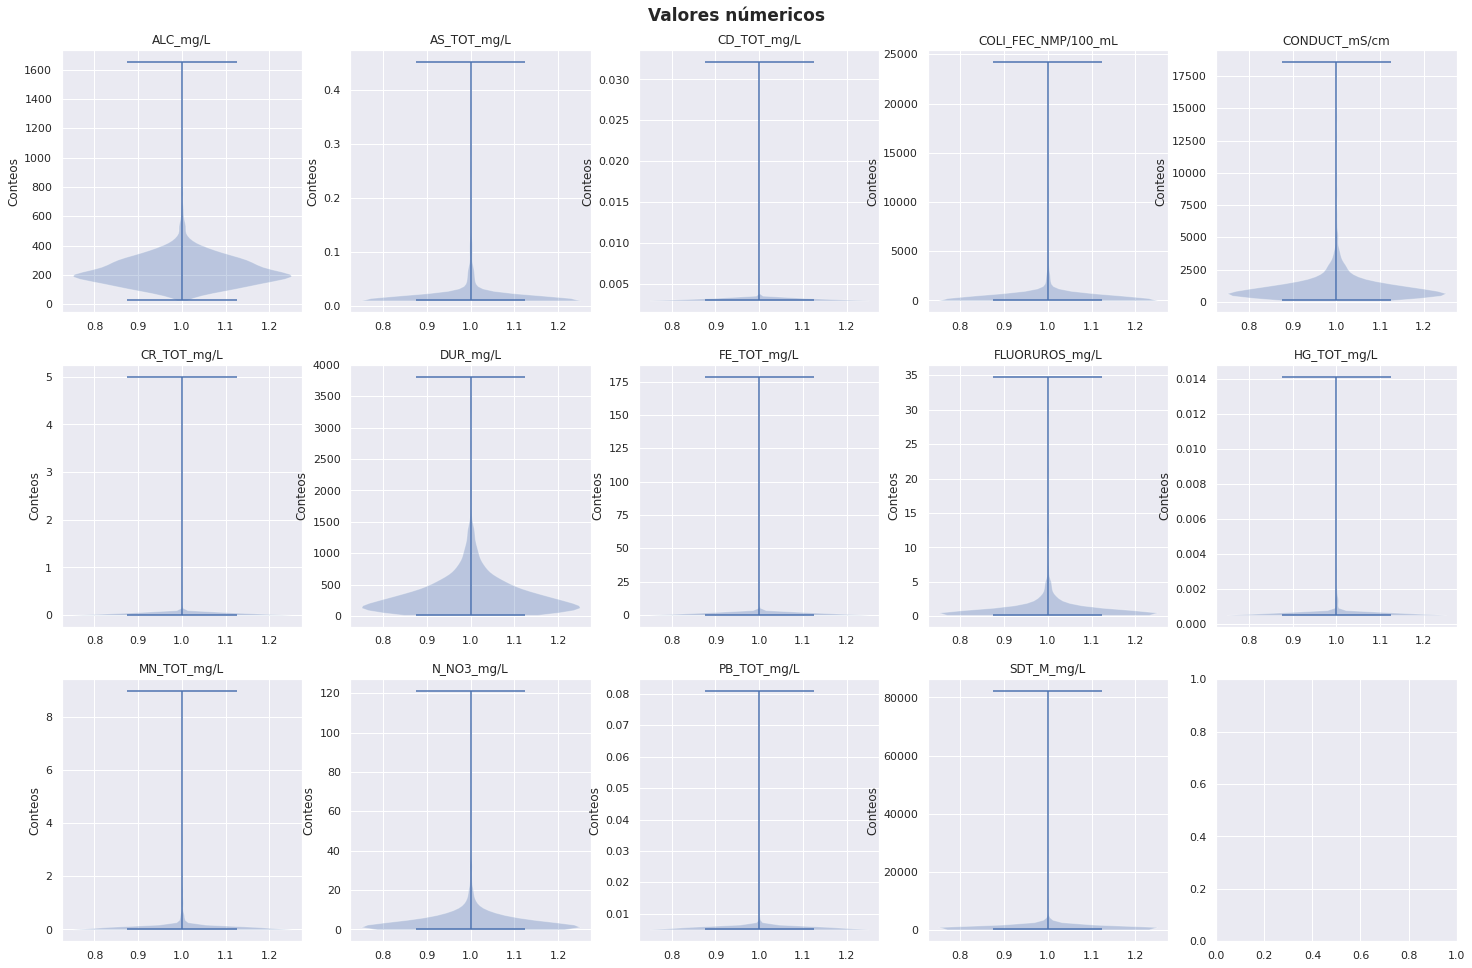

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


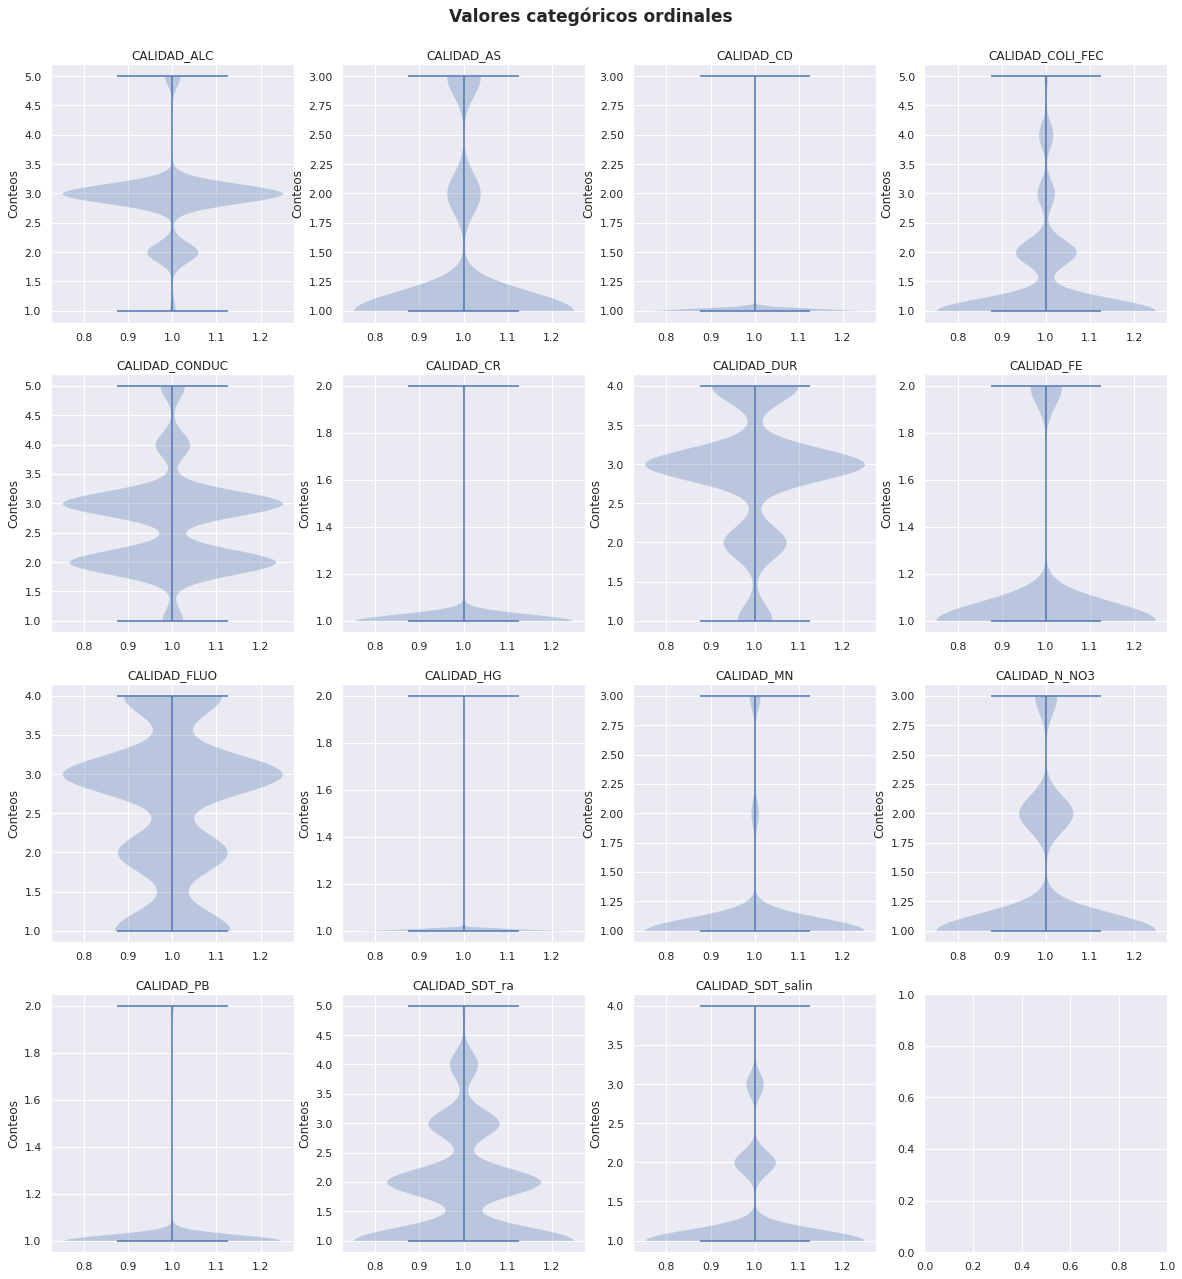

-------------------------------------
-------------------------------------
# de gráficos: 15
Renglones: 4 , columnas: 4


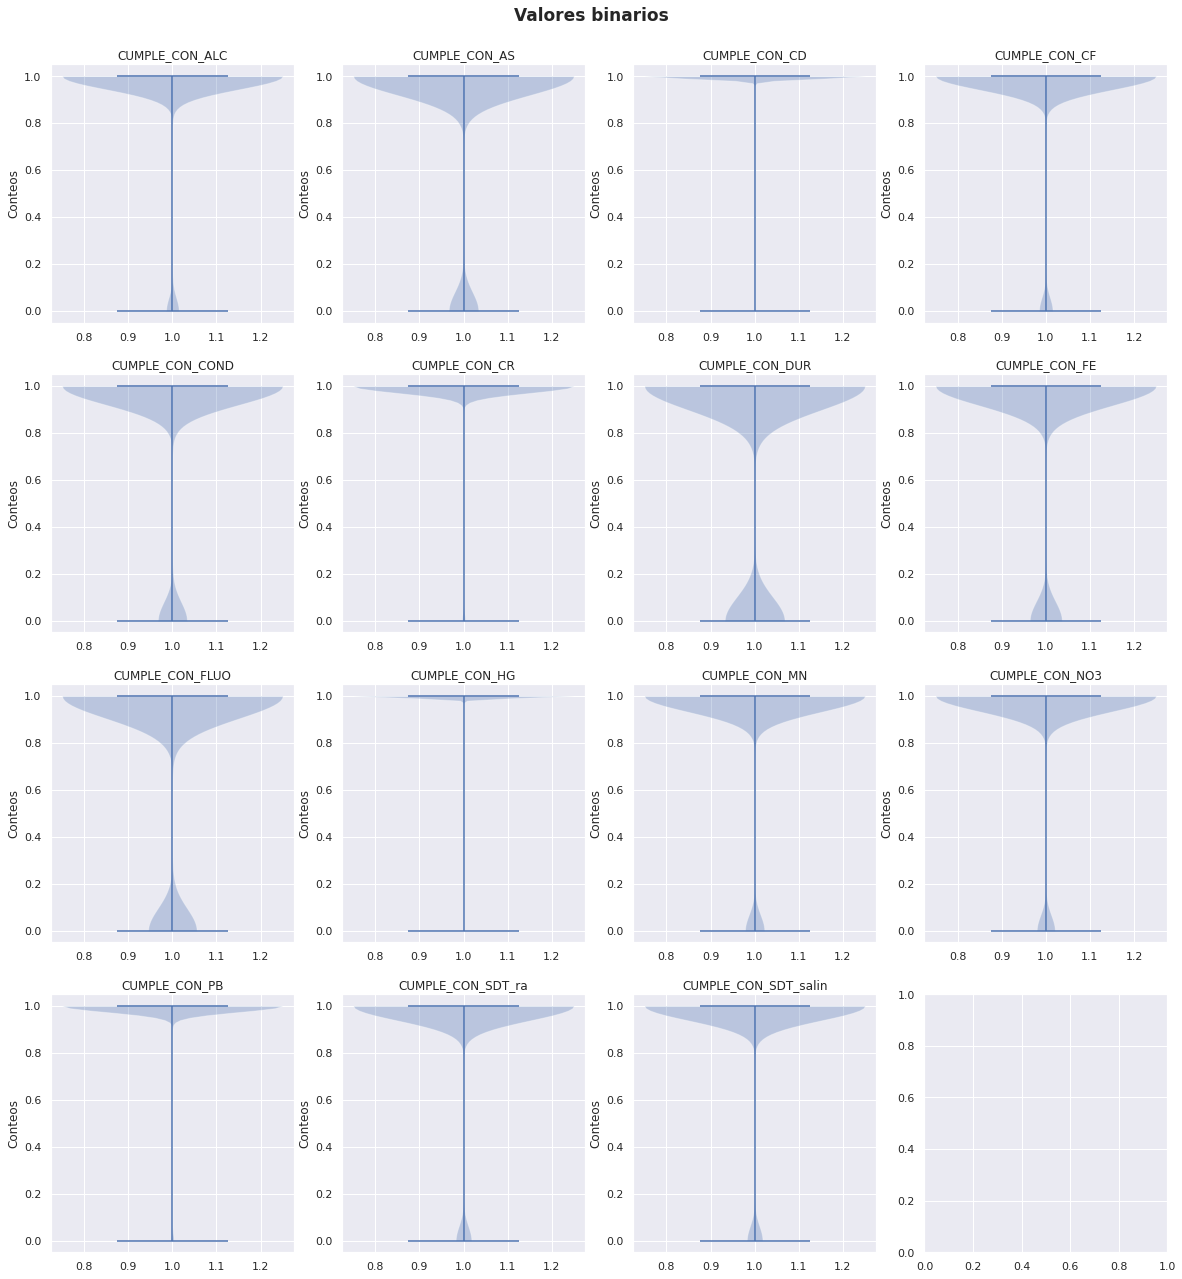

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización de violin de "2. Aguas subterraneas"

Visualiza_violin(df_2_[num_AguSub], 'royalblue', 'Valores númericos')
Visualiza_violin(df_2_[cat_ord_AguSub], 'mediumturquoise', 'Valores categóricos ordinales')
Visualiza_violin(df_2_[cat_bin_AguSub], 'darkgoldenrod', 'Valores binarios')

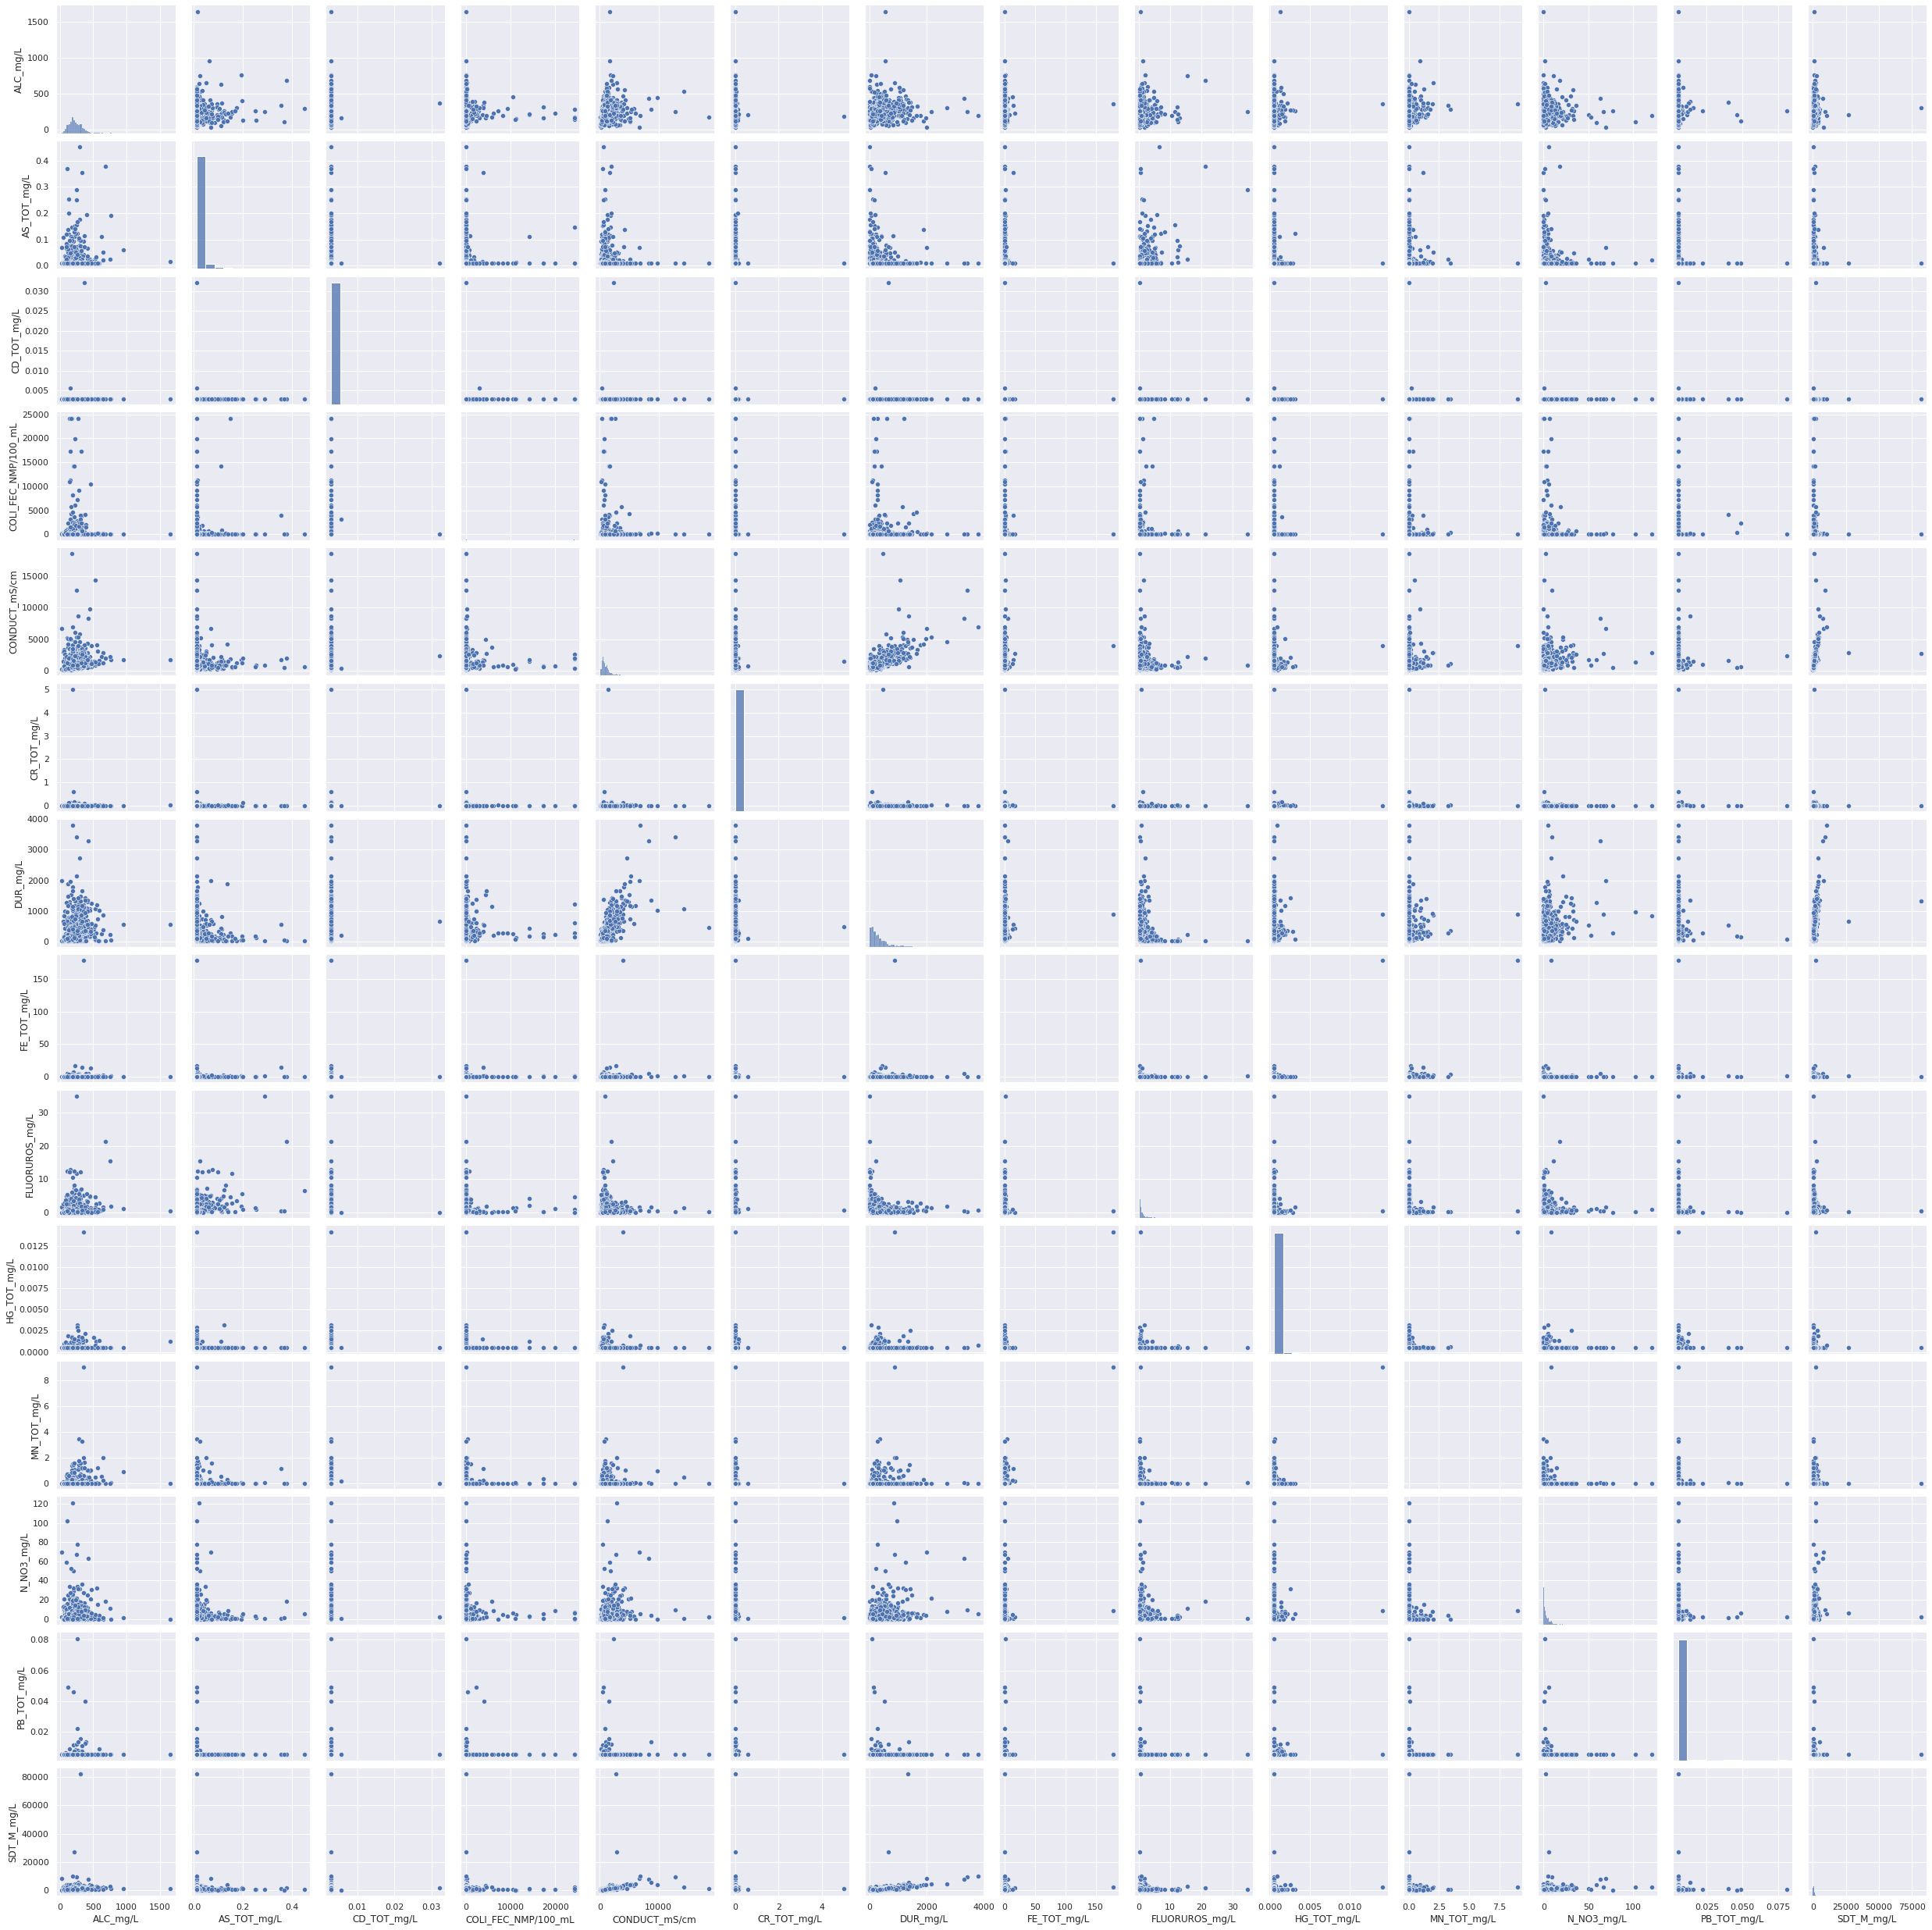

-------------------------------------


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Visualización de Scatter Plot de variables númericas que nos ayuda a ver relaciones entre las variables

Visualiza_exploratorio(df_2_[num_AguSub])

### ¿Para qué nos sirve está información?

Reflexionando sobre el uso de la información, nos damos cuenta de que podríamos utilizarla para clasificar los acuíferos subterraneos y relacionarlos con posibles usos del agua cmo riego, industria, uso doméstico, entre otros. 

Con el entendimiento de la concentración de contaminación de los acuíferos subterraneos, se podría construir un índice de potabilidad del agua.

Con la información obtenida, se nos ocurre realizar 2 análisis distintos: 
 1. Contemplando las variables de calidad (información previamente calificada)
 2. Contemplando las variables de medida.


---

# Graficándo mapa de acuíferos subterraneos

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Cargando Shapes de México: mapa hidrografía, mapa de estados de la republica, mapa de ciudades
# importantes y mapa de regiones de administración del agua en México.

shapefile_mx_hid= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Shape_México/México_Hidrografia.shp')
shapefile_mx_est= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Shape_México/México_Estados.shp')
shapefile_mx_ciu= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Shape_México/México_Ciudades.shp')
shapefile_mx_rah= gpd.read_file('/content/drive/MyDrive/Colab Notebooks/04 - TC4029 Ciencia y analítica de datos/Sem 09/Shape_México/Shapefile - Regiones hidrológicas administrativas/inegi_refregihid_2007.shp')
display(shapefile_mx_hid.head(5))
display(shapefile_mx_ciu.head(5))
display(shapefile_mx_est.head(5))
display(shapefile_mx_rah.head(5))

,NOMBRE,CUENCA,geometry
0,Amajac,None,"LINESTRING (-98.74583 21.27520, -98.78140 21.1..."
1,Balsas,Balsas,"MULTILINESTRING ((-102.91556 19.93055, -102.80..."
2,Bavispe,Yaqui,"LINESTRING (-109.61919 28.90405, -109.58362 28..."
3,Colorado,Colorado,"LINESTRING (-114.72124 32.72083, -114.72126 32..."
4,Conchos,Río Grande,"MULTILINESTRING ((-106.90417 27.84444, -106.62..."


,CIUDAD,CAPITAL,ESTADO,geometry
0,Monterrey,S,Nuevo León,POINT (-100.31709 25.67735)
1,Mazatlán,N,Sinaloa,POINT (-106.41607 23.20383)
2,Guadalajara,S,Jalisco,POINT (-103.34380 20.67359)
3,Tampico,N,Tamaulipas,POINT (-97.84263 22.24323)
4,Ciudad de México,C,Distrito Federal,POINT (-99.12757 19.42705)


,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


,gid,index,clave_oc,org_cuenca,clave_oc2,area_km2,perimetro,geometry
0,1,1.0,1.0,b'Pen\xednsula de Baja California',I,145059.430392,3944.351025,"POLYGON ((-114.81259 32.49378, -114.81308 32.4..."
1,2,2.0,2.0,Noroeste,II,205364.850093,3278.104109,"POLYGON ((-114.81259 32.49378, -114.81237 32.4..."
2,3,3.0,1.0,b'Pen\xednsula de Baja California',I,0.030711,0.660004,"POLYGON ((-117.26224 32.42231, -117.26235 32.4..."
3,4,4.0,1.0,b'Pen\xednsula de Baja California',I,0.075969,1.376206,"POLYGON ((-117.25700 32.41854, -117.25726 32.4..."
4,5,5.0,1.0,b'Pen\xednsula de Baja California',I,1.181881,7.195199,"POLYGON ((-117.24761 32.41822, -117.24654 32.4..."


Text(0.5, 1.0, 'Geolocalización de aguas subterraneas en México')

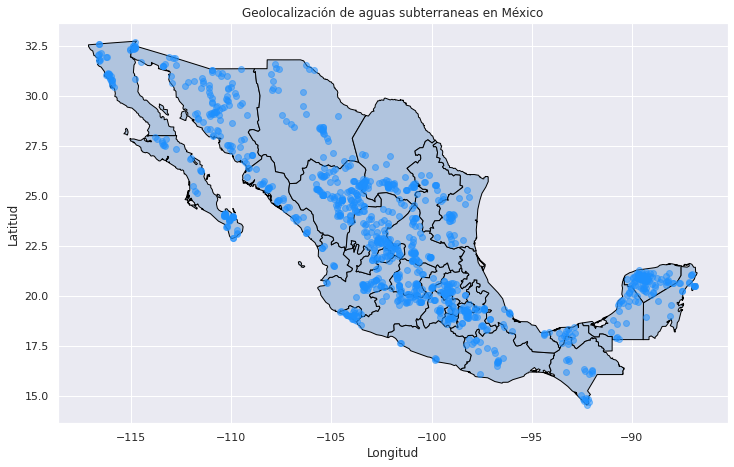

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Cargando el mapa de estados de México con la ubicación de los acuíferos subterraneas

df_2_["Coordenadas"]= list(zip(df_2_.LONGITUD, df_2_.LATITUD))
df_2_["Coordenadas"]= df_2_["Coordenadas"].apply(Point)
#display(df_2_.head())

gdf_2_= gpd.GeoDataFrame(df_2_['Coordenadas'], geometry="Coordenadas")
#display(gdf_2_.head())

fig, gax = plt.subplots(figsize=(12,12))

shapefile_mx_est.plot(ax=gax, edgecolor='black',color='lightsteelblue')
gdf_2_.plot(ax=gax, color='dodgerblue', alpha = 0.5)
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Geolocalización de aguas subterraneas en México')

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Creando data set reducido para gráficar

df_AguSubRed= df_2_[["LATITUD", "LONGITUD", 'CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ACUIFERO', 'SUBTIPO', 'SEMAFORO']].copy()
df_AguSubRed

,LATITUD,LONGITUD,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ACUIFERO,SUBTIPO,SEMAFORO
0,22.20887,-102.02210,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,VALLE DE CHICALOTE,POZO,Verde
1,21.99958,-102.20075,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,VALLE DE CHICALOTE,POZO,Verde
2,22.36685,-102.28801,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,VALLE DE AGUASCALIENTES,POZO,Rojo
3,22.18435,-102.29449,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,VALLE DE AGUASCALIENTES,POZO,Verde
4,23.45138,-110.24480,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,TODOS SANTOS,POZO,Rojo
...,...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,CITRICOLA SUR,POZO,Rojo
1064,24.78280,-99.70099,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,CITRICOLA SUR,POZO,Rojo
1065,25.55197,-99.82249,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,CITRICOLA NORTE,POZO,Rojo
1066,24.80118,-100.32683,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NAVIDAD-POTOSI-RAICES,POZO,Verde


---
# Implementando K-means
---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Implementar K-means

X= np.array(df_AguSubRed[["LATITUD","LONGITUD"]])
y= np.array(df_AguSubRed['SEMAFORO'])
X.shape

(1054, 2)

k means: [KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14)]
score: [-63046.350206902076, -28313.79971608661, -12866.063708953243, -8066.9679185393015, -6389.784324711647, -5096.755788932107, -4246.192187632751, -3478.6898754104814, -2769.300408007919, -2444.361816012308, -2150.327540203088, -1877.9615514463253, -1744.3658557702513, -1589.2909265958601]


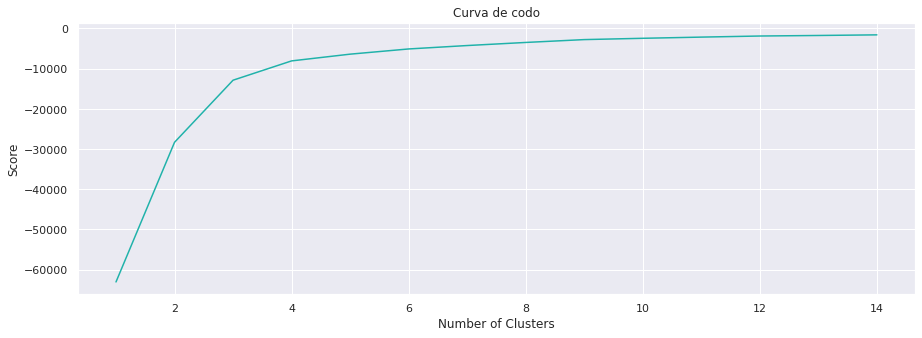

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Obteniendo el valor de "K"

Nc= range(1, 15)
kmeans= [KMeans(n_clusters=i) for i in Nc]
print('k means:',kmeans)
score= [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print('score:',score)
plt.figure(figsize= (15,5))
plt.plot(Nc, score, color= 'lightseagreen')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

**La gráfica de codo indica que es posible hacer una agrupación en K= 2, k= 3 y k= 4 para entrenar el modelo con k clusters.**

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Implementando k-means con 3 clusters (k= 3)

print('Implementando K-means\n')
kmeans_c= KMeans(n_clusters= 3).fit(X)
centroids= kmeans_c.cluster_centers_
etiquetas= kmeans_c.predict(X)
print('Centroids:', len(centroids), '\t\tEtiquetas:', len(etiquetas), '\n')

C= kmeans_c.cluster_centers_
df_AguSubRed_centroids= pd.DataFrame(centroids)
df_AguSubRed_centroids.columns= ['Latitud', 'Longitud']

df_AguSubRed_centroids["Coordenadas"]= list(zip(df_AguSubRed_centroids.Longitud, df_AguSubRed_centroids.Latitud))
df_AguSubRed_centroids["Coordenadas"]= df_AguSubRed_centroids["Coordenadas"].apply(Point)
df_AguSubRed
print('Tabla con centroides obtenidos\n')
g_df_AguSubRed_centroids= gpd.GeoDataFrame(df_AguSubRed_centroids, geometry="Coordenadas")
g_df_AguSubRed_centroids.head()

Implementando K-means

Centroids: 3 		Etiquetas: 1054 

Tabla con centroides obtenidos



,Latitud,Longitud,Coordenadas
0,22.271624,-101.715581,POINT (-101.71558 22.27162)
1,19.475165,-90.698434,POINT (-90.69843 19.47516)
2,28.420375,-110.740896,POINT (-110.74090 28.42038)


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Obteniendo etiquetas

print('Etiquetas:',etiquetas)
print('Tamaño:',etiquetas.shape,'\nC:  Latitud \t Longitud')
print(C)

colores= ['darkred','darkgreen','indigo']#, 'steelblue']
colores_asignados=[]
for row in etiquetas:
    colores_asignados.append(colores[row])

print('\nTotal de renglones vinculados con su color:', len(colores_asignados), '\n')

Etiquetas: [0 0 0 ... 0 0 0]
Tamaño: (1054,) 
C:  Latitud 	 Longitud
[[  22.27162356 -101.71558109]
 [  19.47516461  -90.69843377]
 [  28.42037512 -110.74089614]]

Total de renglones vinculados con su color: 1054 



In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Asignando etiquetas

df_AguSubRed_eti= pd.DataFrame(etiquetas) # Convirtiendo array en data frame
print('Total de etiquetas de clusters asignados:', df_AguSubRed_eti.count(), '\n')
df_AguSubRed_col= pd.DataFrame(colores_asignados) # Convirtiendo array en data frame
print('Total de etiquetas de colores asignados:', df_AguSubRed_col.count(), '\n')

df_2_clas= df_AguSubRed.copy()
df_2_clas['Etiqueta']= df_AguSubRed_eti
df_2_clas['Color']= df_AguSubRed_col

df_2_clas.info()
#df_2_clas= Busca_Nulos_(df_2_clas, 'delete')
#df_2_clas.info()


Total de etiquetas de clusters asignados: 0    1054
dtype: int64 

Total de etiquetas de colores asignados: 0    1054
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LATITUD              1054 non-null   float64
 1   LONGITUD             1054 non-null   float64
 2   CLAVE                1054 non-null   object 
 3   SITIO                1054 non-null   object 
 4   ORGANISMO_DE_CUENCA  1054 non-null   object 
 5   ACUIFERO             1054 non-null   object 
 6   SUBTIPO              1054 non-null   object 
 7   SEMAFORO             1054 non-null   object 
 8   Etiqueta             1040 non-null   float64
 9   Color                1040 non-null   object 
dtypes: float64(3), object(7)
memory usage: 122.9+ KB


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Contando clusters

totalXcluster=  pd.DataFrame()
totalXcluster['Color']= colores
totalXcluster['Cantidad_x_grupo_k4']= df_2_clas.groupby('Etiqueta').size()
totalXcluster['%']= round(totalXcluster['Cantidad_x_grupo_k4']*100/totalXcluster['Cantidad_x_grupo_k4'].sum(), 1)
totalXcluster

,Color,Cantidad_x_grupo_k4,%
0,darkred,631,60.7
1,darkgreen,179,17.2
2,indigo,230,22.1


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Buscando acuíferos subterráneos cercanos a cada centroide

closest, _= pairwise_distances_argmin_min(kmeans_c.cluster_centers_, X)
closest

array([563,  57, 842])

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Encontrando los nombres de los acuíferos subterráneos más cercanos a los centroides de cada cluster

print('Acuíferos subterraneos cercanos a los centroides de cada cluster\n')
k_acuifero= df_2_clas['ACUIFERO'].values
k_sitio= df_2_clas['SITIO'].values
k_subtipo= df_2_clas['SUBTIPO'].values
k_etiqueta= df_2_clas['Etiqueta'].values
for row in closest:
    print('Acuífero subterraneo:', k_acuifero[row], '\n\t\t      subtipo:', k_subtipo[row], '\n\t\t      sitio:', k_sitio[row], '\n\t\t      cluster:',k_etiqueta[row], '\n')

Acuíferos subterraneos cercanos a los centroides de cada cluster

Acuífero subterraneo: PINOS 
		      subtipo: POZO 
		      sitio: PINOS 
		      cluster: 0.0 

Acuífero subterraneo: PENINSULA DE YUCATAN 
		      subtipo: POZO 
		      sitio: POZO DEL SISTEMA DE AGUA POTABLE DE VILLA MADERO 
		      cluster: 1.0 

Acuífero subterraneo: VALLE DE GUAYMAS 
		      subtipo: POZO 
		      sitio: POZO EL DESTIERRO 
		      cluster: 2.0 



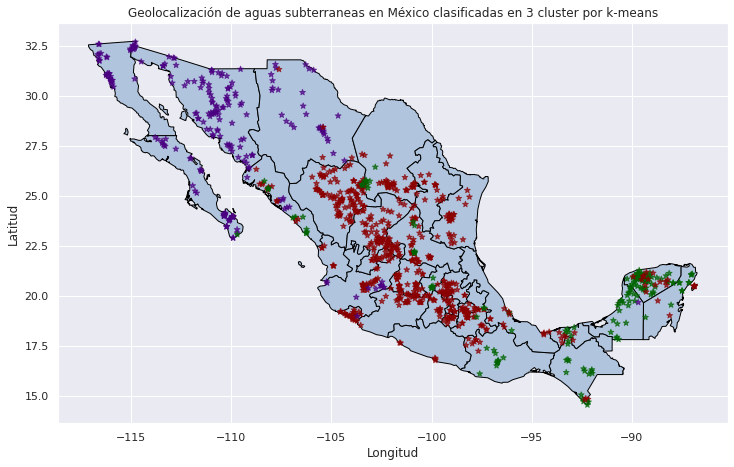

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Cargando el mapa de México con la ubicación y agrupación de los acuíferos subterraneos

#Busca_Nulos(g_df_2_clas_map)
df_2_clas['Color']= df_2_clas['Color'].replace(['SIN DATOS','N/A', 0, '', np.nan], 'darkred')
#Busca_Nulos(g_df_2_clas_map)

df_2_clas_map= df_2_clas.copy()
df_2_clas_map['Coordenadas']= list(zip(df_2_clas_map.LONGITUD, df_2_clas_map.LATITUD))
df_2_clas_map['Coordenadas']= df_2_clas_map['Coordenadas'].apply(Point)
g_df_2_clas_map= gpd.GeoDataFrame(df_2_clas_map, geometry='Coordenadas')


fig, gax = plt.subplots(figsize= (12,12))
shapefile_mx_est.plot(ax= gax, edgecolor= 'black',color= 'lightsteelblue')
g_df_2_clas_map.plot(ax= gax, color= g_df_2_clas_map['Color'], alpha= 0.7, marker= "*")
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Geolocalización de aguas subterraneas en México clasificadas en 3 cluster por k-means')
plt.show()

---

# Comparando clusters con variable semáforo

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  
# Comparando clusters con semáforo

totalXclusterXsemaforo=  df_2_clas[['SEMAFORO','Color',]].copy()
totalXclusterXsemaforo['Conteo']= 1
print('Agrupando por color:\n')
agrupacion= totalXclusterXsemaforo.groupby(['Color', 'SEMAFORO'])
print(agrupacion.count())

Agrupando por color:

                    Conteo
Color     SEMAFORO        
darkgreen Amarillo      75
          Rojo          36
          Verde         68
darkred   Amarillo      51
          Rojo          84
          Verde        109
indigo    Amarillo     119
          Rojo         262
          Verde        250


- Podemos observar que los 3 clusters obtenidos utilizando k-means no corresponden al semáforo proporcionado en la información de aguas subterraneas.



---

# Conclusiones finales

- Este ejercicio nos deja ver el tiempo y la importancia que se requiere para la preparación de los datos, desde el momento en el que se obtiene del data set, se códifica para poderlo utilizar, se entienden sus variables y contexto, se accede al contenido de cada variable, se observan las medidas de tendencia central, máximos, minímos, dispersión de los datos, se clasifican en tipos de variables, se limpian eliminando, imputando o remplazando datos de cada observación y hasta el momento de poder ver de forma gráfica los datos y comprenderlos a profundidad entendiendo la relación existente entre cada variable.

- En el caso de la aplicación del modelo con k-means encontramos que se hace una categorización de grupos que son muy parecidos entre si y grupos que son muy distintos entre si.

- Al final no logramos encontrar una relación entre la distribución geográfica de los acuíferos subterraneos y la clasificación del semáforo que se le dio al data set.

---

---

# Fin Reto entrega 1

---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - 
#

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n- - - - - - - - - - - - - - - - - - - - - \n')
print(':\n',)
print(':\n',)

print('\n5- - - - - - - - - - - - - - - - - - - - - \n')

print('\n:',)
print('\n:',)
print('\n:',)